In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_formats = set(('retina', 'svg'))

In [ ]:
pl_mains = pd.read_csv('/content/drive/MyDrive/MSc Project - Football Prediction/pl.csv')

# **HOME/NOT HOME ensemble model**

In [ ]:
# Define a custom function to apply the transformation
def create_wnw(row):
    if row['FTR'] == 'H':
        return 'H'
    elif row['FTR'] in ['A', 'D']:
        return 'NH'
    else:
        return None

In [ ]:
pl = pd.read_csv('/content/drive/MyDrive/MSc Project - Football Prediction/pl.csv')

In [ ]:
pl['WNW'] = pl.apply(create_wnw, axis=1)

In [ ]:
pl['WNW'].value_counts()

NH    2302
H     1878
Name: WNW, dtype: int64

In [ ]:
pl = pl.drop(columns=['FTR'])

In [ ]:
from sklearn.model_selection import train_test_split


X = pl.drop(columns=['WNW'])
y = pl['WNW']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

## scaling the data

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer

In [ ]:
# Create transformers
stdscaling_transformer = StandardScaler()
normscaling_transformer = Normalizer()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("std", stdscaling_transformer, std_cols),
        ("norm", normscaling_transformer, norm_cols)
    ],
    remainder='passthrough'
)

# Apply the transformations and convert back to a pandas DataFrame
X_train_scale = preprocessor.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=std_cols + norm_cols)

In [ ]:
X_train_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
0  0.007046  0.549229 -0.009621  0.364080  0.725299 -1.375716  0.367912   
1 -0.348570 -0.880736 -0.714737 -0.036873 -1.348171  1.688199 -0.936050   
2  0.007046 -0.267894 -0.714737 -0.437826  0.132879  0.295510  1.019894   
3 -1.237611 -1.085017 -1.067295 -0.838778 -0.163331 -0.261565 -1.262041   
4 -0.881995  1.570633 -1.419853  1.165986  3.687399  0.295510 -1.262041   

         AC        HY        AY  ...  Elo_Before_Away     Days_D  form_diff  \
0 -1.743391  1.207190 -1.369708  ...        -0.136565   0.100487  -0.009676   
1  0.119653 -0.438279  1.722248  ...         0.782275   4.476563  -0.025650   
2  0.492261  1.207190  0.176270  ...        -1.419827  -0.085729   0.553088   
3  0.492261 -0.438279  0.949259  ...         1.323745   0.007379   0.101380   
4  1.610088  1.207190  0.176270  ...        -0.238686  10.528583   0.084392   

    SP_diff        MW      Year  Overall_diff  Attack_diff  Midfield_diff  \
0  0.017246  0.000993  0.999987      0.002483     0.002483       0.001986   
1 -0.789449  0.003954  0.999990     -0.000989    -0.000989       0.000000   
2  0.823941  0.015879  0.999865      0.002481     0.001985       0.001985   
3  0.017246  0.003962  0.999987     -0.001486     0.000000      -0.002476   
4 -0.386102  0.004449  0.999983     -0.001977    -0.001977      -0.000989   

   Defence_diff  
0      0.002979  
1     -0.001483  
2      0.001985  
3     -0.000991  
4     -0.002472  

[5 rows x 35 columns]

In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)
X_val_scale = pd.DataFrame(X_val_scale, columns=std_cols + norm_cols)

X_val_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
0 -0.320599 -0.312972  0.685797 -0.896903  1.375084  0.608376 -0.550323   
1  1.411877 -0.518244  0.685797  0.348830 -0.736926 -0.550353  1.007063   
2  0.545639  0.508119  0.017968 -0.066414 -1.340357 -0.550353 -0.550323   
3 -0.493846 -0.928789 -1.317689 -0.896903 -1.340357 -1.129717  0.072631   
4 -0.147351 -0.928789 -0.315946 -1.312147 -0.435210 -0.260671  2.564449   

         AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
0 -0.677915 -0.429814  1.869933  ...         0.025540 -1.524894  -0.176214   
1 -0.677915  0.389404 -0.532727  ...        -0.795764  0.004445   0.520097   
2 -0.321090  0.389404  0.268159  ...         0.302770 -0.080518  -0.066477   
3 -0.677915  0.389404  1.069046  ...         0.492413 -0.080518  -0.509134   
4 -0.677915 -1.249032 -0.532727  ...        -2.544650 -0.080518   2.418901   

    SP_diff        MW      Year  Overall_diff  Attack_diff  Midfield_diff  \
0  0.482873  0.014334  0.999893     -0.000989    -0.001977      -0.001483   
1  0.674722  0.017828  0.999841      0.000495     0.000000       0.000495   
2 -0.476373  0.005940  0.999925      0.004950     0.006435       0.005445   
3 -1.243770  0.011374  0.999923     -0.002473    -0.002473      -0.002967   
4  1.825818  0.016862  0.999829      0.002976     0.005951       0.003472   

   Defence_diff  
0     -0.000989  
1      0.000000  
2      0.004455  
3     -0.001978  
4      0.000992  

[5 rows x 35 columns]

In [ ]:
X_test_scale = preprocessor.fit_transform(X_test)
X_test_scale = pd.DataFrame(X_test_scale, columns=std_cols + norm_cols)

X_test_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
0 -0.561743  0.544859 -0.690512  1.858131 -1.599067  0.662203  1.707644   
1 -0.201469  1.573545 -1.023808  0.693956 -1.021482  0.947713 -1.209775   
2 -0.922016  1.779283 -1.023808  2.246189  0.133687  1.233222  0.411013   
3  0.338942 -1.101039  0.309375 -0.082161 -1.021482  1.518731  3.004274   
4 -0.741879 -0.483827 -0.690512 -0.470219 -0.732690  0.091185 -0.561460   

         AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
0  0.137403 -1.295508  1.093057  ...        -0.059681  0.033114   0.137591   
1  0.873739 -0.474398  1.936043  ...        -0.174328  0.033114   0.174896   
2 -0.598934 -0.474398 -0.592913  ...         0.395013  0.142535  -0.380491   
3  0.137403  1.167824  3.622013  ...        -0.043499  0.142535   0.107122   
4 -0.967103 -0.474398 -0.592913  ...         0.854950  0.033114   0.844239   

    SP_diff        MW      Year  Overall_diff  Attack_diff  Midfield_diff  \
0  1.014738  0.006448  0.999973      0.000992     0.000992       0.002480   
1  2.477192  0.001488  0.999987     -0.002480    -0.001984      -0.001984   
2 -1.520183  0.010885  0.999937     -0.001484    -0.001484      -0.001484   
3  0.429756  0.002978  0.999993      0.000496     0.000496       0.001489   
4  1.014738  0.012864  0.999891      0.003463     0.003463       0.003463   

   Defence_diff  
0      0.001984  
1     -0.002976  
2     -0.000990  
3      0.001489  
4      0.003958  

[5 rows x 35 columns]

In [ ]:
hnh_selected_features_logistic = ['HS', 'HST', 'AST', 'HF', 'HC', 'AC', 'HY', 'HR', 'AvgH', 'MaxA',
       'Max>2.5', 'Avg>2.5', 'Avg<2.5', 'TGD', 'Days_D', 'form_diff', 'MW',
       'Year', 'Overall_diff', 'Attack_diff', 'Midfield_diff', 'Defence_diff']
hnh_selected_features_histgradboost = ['HS', 'AS', 'HST', 'AST', 'HF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR',
       'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA', 'MW', 'Year', 'Max>2.5',
       'Max<2.5', 'Avg>2.5', 'TGD', 'Elo_Before_Home', 'Days_D', 'form_diff',
       'Overall_diff', 'Attack_diff', 'Midfield_diff', 'Defence_diff']
hnh_selected_features_svc = ['HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HY', 'HR', 'AR', 'AvgD', 'AvgA',
       'MaxH', 'MaxD', 'MaxA', 'Max>2.5', 'Avg<2.5', 'Prob_D', 'Days_D',
       'SP_diff', 'MW', 'Overall_diff', 'Attack_diff', 'Midfield_diff',
       'Defence_diff']
hnh_selected_features_mlp = X_train_scale.columns

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression(multi_class='ovr', solver='liblinear',C = 0.1, class_weight = 'balanced', penalty = 'l1')

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
hgc = HistGradientBoostingClassifier(l2_regularization = 0.1,
    learning_rate = 0.1,
    max_depth = 3,
    max_leaf_nodes = 200,
    min_samples_leaf = 20,
    max_iter = 50)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(C = 1,
 class_weight = None,
 degree = 2,
 gamma = 'scale',
 kernel = 'linear')

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(150,),
              learning_rate='invscaling', max_iter=3000)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, selected_features):
        self.selected_features = selected_features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.selected_features]

In [ ]:
# Create custom transformers for each model's selected features
hnh_feature_selector_svm = FeatureSelector(hnh_selected_features_svc)
hnh_feature_selector_histgradboost = FeatureSelector(hnh_selected_features_histgradboost)
hnh_feature_selector_logistic = FeatureSelector(hnh_selected_features_logistic)
hnh_feature_selector_mlp = FeatureSelector(hnh_selected_features_mlp)


# Fit the transformers on your training data
X_train_svm = hnh_feature_selector_svm.fit_transform(X_train_scale)
X_train_histgradboost = hnh_feature_selector_histgradboost.fit_transform(X_train_scale)
X_train_logistic = hnh_feature_selector_logistic.fit_transform(X_train_scale)
X_train_mlp = hnh_feature_selector_mlp.fit_transform(X_train_scale)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical target variables to integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
y_val_encoded = label_encoder.fit_transform(y_val)

# Get the number of classes in the target variable
num_classes = len(label_encoder.classes_)

In [ ]:
num_classes

2

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score

# Initialize StratifiedKFold with SMOTE
skf = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)

# Iterate over the cross-validation folds
for train_idx, val_idx in skf.split(X_train_scale, y_train_encoded):
    X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]  # Use iloc to access data by index
    y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

    # Apply SMOTE to the training fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

    # Transform the features for each model using the respective selectors
    X_train_svm = hnh_feature_selector_svm.fit_transform(X_train_fold_resampled)
    X_train_histgradboost = hnh_feature_selector_histgradboost.fit_transform(X_train_fold_resampled)
    X_train_logistic = hnh_feature_selector_logistic.fit_transform(X_train_fold_resampled)
    X_train_mlp = hnh_feature_selector_mlp.fit_transform(X_train_fold_resampled)

In [ ]:
# Create a VotingClassifier with the individual models
ensemble_model_HNH = VotingClassifier(estimators=[
    ('svm', svc),
    ('histgradboost', hgc),
    ('logistic', lg),
    ('mlp',mlp)
], voting='hard')  # Adjust the voting strategy as needed


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from itertools import product


# Initialize StratifiedKFold with SMOTE
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

weight_ranges = [0.1, 0.2, 0.3, 0.4]
num_models = 4

# Initialize variables to store the best weight combination and accuracy
best_weight_combination = None
best_accuracy = 0.0

# Generate all possible weight combinations
weight_combinations = list(product(weight_ranges, repeat=num_models))

# Create the VotingClassifier with the individual models
ensemble_model_HNH = VotingClassifier(estimators=[
    ('svm', svc),
    ('histgradboost', hgc),
    ('logistic', lg),
    ('mlp',mlp)
], voting='hard',n_jobs=-1) # Hard voting

# Iterate over weight combinations
for weights in weight_combinations:
    # Ensure that the weights sum up to 1 (if needed)
    if sum(weights) != 1.0:
        continue

    # Initialize an array to store accuracy scores for each fold
    fold_accuracies = []

    # Iterate over the cross-validation folds
    for train_idx, val_idx in skf.split(X_train_scale, y_train_encoded):
        X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

        # Apply SMOTE to the training fold
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

        # Set the weights for the current combination
        ensemble_model_HNH.set_params(weights=weights)

        # Fit the VotingClassifier on the transformed training data
        ensemble_model_HNH.fit(X_train_fold_resampled, y_train_fold_resampled)

        # Make predictions on the validation set
        y_pred = ensemble_model_HNH.predict(X_val_fold)
        y_pred_encoded = label_encoder.fit_transform(y_pred)

        # Calculate accuracy (you can use other metrics as well)
        accuracy = accuracy_score(y_val_fold, y_pred_encoded)

        # Append the accuracy score to the list
        fold_accuracies.append(accuracy)

    # Calculate the average accuracy across all folds for this weight combination
    avg_accuracy = np.mean(fold_accuracies)

    # Check if this combination of weights is the best so far
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_weight_combination = weights

# Print the best weight combination and its corresponding accuracy
print("Best Weight Combination:", best_weight_combination)
print("Best Accuracy:", best_accuracy)


Best Weight Combination: (0.1, 0.4, 0.1, 0.4)
Best Accuracy: 0.7413084112149534


In [ ]:
# Create a VotingClassifier with the individual models
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from itertools import product
ensemble_model_HNH = VotingClassifier(estimators=[
    ('svm', svc),
    ('histgradboost', hgc),
    ('logistic', lg),
    ('mlp',mlp)
], voting='hard',weights =(0.1, 0.4, 0.1, 0.4), n_jobs=-1 )  # Adjust the voting strategy as needed


# Initialize StratifiedKFold with SMOTE
skf = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)

# Iterate over the cross-validation folds
for train_idx, val_idx in skf.split(X_train_scale, y_train_encoded):
    X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]  # Use iloc to access data by index
    y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

    # Apply SMOTE to the training fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    # Fit the VotingClassifier on the transformed datasets
    ensemble_model_HNH.fit(X_train_fold_resampled, y_train_fold_resampled)

In [ ]:
ensemble_model_HNH

VotingClassifier(estimators=[('svm', SVC(C=1, degree=2, kernel='linear')),
                             ('histgradboost',
                              HistGradientBoostingClassifier(l2_regularization=0.1,
                                                             max_depth=3,
                                                             max_iter=50,
                                                             max_leaf_nodes=200)),
                             ('logistic',
                              LogisticRegression(C=0.1, class_weight='balanced',
                                                 multi_class='ovr',
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('mlp',
                              MLPClassifier(alpha=0.001, early_stopping=True,
                                            hidden_layer_sizes=(150,),
                                            learning_rate='invscaling',
                                            max_iter=3000))],
                 n_jobs=-1, weights=(0.1, 0.4, 0.1, 0.4))

In [ ]:
ensemble_model_HNH.feature_names_in_

array(['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA', 'Max>2.5',
       'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'TGD', 'Prob_D',
       'Elo_Before_Home', 'Elo_Before_Away', 'Days_D', 'form_diff',
       'SP_diff', 'MW', 'Year', 'Overall_diff', 'Attack_diff',
       'Midfield_diff', 'Defence_diff'], dtype=object)

In [ ]:
ensemble_model_HNH.estimators_

[SVC(C=1, degree=2, kernel='linear'),
 HistGradientBoostingClassifier(l2_regularization=0.1, max_depth=3, max_iter=50,
                                max_leaf_nodes=200),
 LogisticRegression(C=0.1, class_weight='balanced', multi_class='ovr',
                    penalty='l1', solver='liblinear'),
 MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(150,),
               learning_rate='invscaling', max_iter=3000)]

In [ ]:
ensemble_model_HNH.get_feature_names_out

<bound method VotingClassifier.get_feature_names_out of VotingClassifier(estimators=[('svm', SVC(C=1, degree=2, kernel='linear')),
                             ('histgradboost',
                              HistGradientBoostingClassifier(l2_regularization=0.1,
                                                             max_depth=3,
                                                             max_iter=50,
                                                             max_leaf_nodes=200)),
                             ('logistic',
                              LogisticRegression(C=0.1, class_weight='balanced',
                                                 multi_class='ovr',
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('mlp',
                              MLPClassifier(alpha=0.001, early_stopping=True,
                                            hidden_layer_sizes=(150

In [ ]:
y_val_pred = ensemble_model_HNH.predict(X_val_scale)
accuracy = accuracy_score(y_val_encoded, y_val_pred)
accuracy

0.7414050822122571

In [ ]:
from sklearn.metrics import classification_report
y_pred_ensemble_model = ensemble_model_HNH.predict(X_val_scale)
class_report_ensemble_model = classification_report(y_val_encoded, y_pred_ensemble_model )
print("\nClassification Report:")
print(class_report_ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       298
           1       0.80      0.71      0.75       371

    accuracy                           0.74       669
   macro avg       0.74      0.75      0.74       669
weighted avg       0.75      0.74      0.74       669



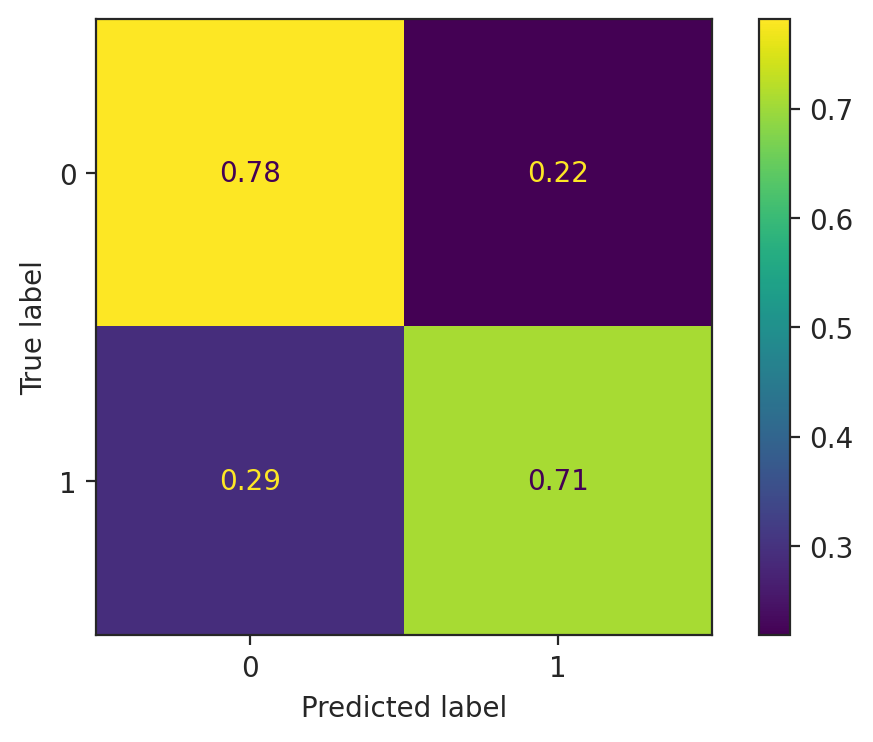

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val_encoded, ensemble_model_HNH.predict(X_val_scale), normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
import pickle

# Save the ensemble_model to a file
with open('ensemble_model_HNH.pkl', 'wb') as model_file:
    pickle.dump(ensemble_model_HNH, model_file)

# **AWAY/NOT AWAY ensemble model**

In [ ]:
# Define a custom function to apply the transformation
def create_ana(row):
    if row['FTR'] == 'A':
        return 'A'
    elif row['FTR'] in ['H', 'D']:
        return 'NA'
    else:
        return None

In [ ]:
pl = pd.read_csv('/content/drive/MyDrive/MSc Project - Football Prediction/pl.csv')

In [ ]:
pl.columns

Index(['FTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA', 'MW',
       'Year', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'TGD', 'Prob_D',
       'Elo_Before_Home', 'Elo_Before_Away', 'Days_D', 'form_diff', 'SP_diff',
       'Overall_diff', 'Attack_diff', 'Midfield_diff', 'Defence_diff'],
      dtype='object')

In [ ]:
pl['ANA'] = pl.apply(create_ana, axis=1)

In [ ]:
pl['ANA'].value_counts()

NA    2868
A     1312
Name: ANA, dtype: int64

In [ ]:
pl = pl.drop(columns=['FTR'])

In [ ]:
from sklearn.model_selection import train_test_split


X = pl.drop(columns=['ANA'])
y = pl['ANA']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

## scaling the data

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer

In [ ]:
# Create transformers
stdscaling_transformer = StandardScaler()
normscaling_transformer = Normalizer()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("std", stdscaling_transformer, std_cols),
        ("norm", normscaling_transformer, norm_cols)
    ],
    remainder='passthrough'
)

# Apply the transformations and convert back to a pandas DataFrame
X_train_scale = preprocessor.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=std_cols + norm_cols)

In [ ]:
X_train_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
0  0.719291 -0.068497 -0.344458 -0.846806 -0.749180  0.007827  0.387640   
1  1.778528 -0.477947  0.353327  0.371920 -1.338002  0.290761 -0.583881   
2  0.719291 -1.501574 -0.693351 -1.659291 -0.454769 -0.275107 -0.907721   
3 -0.869564  1.978756  0.353327  1.184405 -0.454769 -1.406842 -0.260041   
4  1.072370 -0.887398  1.051113 -0.440564 -1.043591  0.573695 -0.907721   

         AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
0 -0.638109 -1.254484  0.183019  ...        -0.807417 -0.004156   1.000239   
1 -0.267115 -0.441167  0.960121  ...        -0.979516 -0.004156   0.247957   
2 -0.638109 -0.441167  1.737224  ...        -1.451476  2.237324  -0.286267   
3  2.700834 -1.254484 -1.371187  ...        -0.626763 -0.004156   2.359889   
4 -1.380096 -1.254484 -0.594084  ...         1.793697 -0.004156  -0.195649   

    SP_diff        MW      Year  Overall_diff  Attack_diff  Midfield_diff  \
0  0.424784  0.013887  0.999891      0.002480     0.002976       0.002480   
1  1.418284  0.006429  0.999972      0.001484     0.001978       0.002473   
2  0.027385  0.015855  0.999872      0.000991     0.000495       0.000991   
3  1.219584  0.015390  0.999880      0.000496    -0.000496       0.000993   
4 -0.370015  0.009405  0.999928     -0.003960    -0.004455      -0.003465   

   Defence_diff  
0      0.001984  
1      0.001484  
2      0.001486  
3      0.000993  
4     -0.002970  

[5 rows x 35 columns]

In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)
X_val_scale = pd.DataFrame(X_val_scale, columns=std_cols + norm_cols)

X_val_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
0 -1.958078  0.522275 -1.079245  1.107549 -0.454942  0.063528 -1.612581   
1  0.536394 -0.697988  1.005495 -0.468941  0.783536 -1.843519  0.946889   
2  1.249100 -1.104742  1.352952 -0.074818 -1.693419 -0.208908  3.826293   
3  0.892747  0.522275  1.352952  0.713426 -0.764561  0.335963  0.626955   
4 -0.889019 -1.104742 -0.036875 -0.468941  1.402775  1.153269 -0.332846   

         AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
0 -0.989545 -0.418118  0.238479  ...         1.069591  0.054890   0.365082   
1  1.542716  1.303241 -0.543591  ...        -1.251670 -0.044089   0.518769   
2 -1.713048 -1.278797 -0.543591  ...        -0.840097 -0.044089   0.994748   
3  1.180965  0.442562  1.020548  ...        -1.771235  0.054890   0.917668   
4  0.095710 -0.418118  3.366757  ...         0.523247  0.054890   0.258993   

    SP_diff        MW      Year  Overall_diff  Attack_diff  Midfield_diff  \
0  1.684272  0.009896  0.999946     -0.001484    -0.000495      -0.000990   
1  0.467869  0.008403  0.999947      0.002471     0.002966       0.003954   
2  0.467869  0.011892  0.999892      0.003964     0.004955       0.004955   
3  0.467869  0.016888  0.999854      0.000993     0.000000       0.001987   
4  0.670603  0.005451  0.999983      0.000000    -0.000991       0.001487   

   Defence_diff  
0     -0.002474  
1      0.001977  
2      0.002973  
3      0.000993  
4      0.000496  

[5 rows x 35 columns]

In [ ]:
X_test_scale = preprocessor.fit_transform(X_test)
X_test_scale = pd.DataFrame(X_test_scale, columns=std_cols + norm_cols)

X_test_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
0 -0.561743  0.544859 -0.690512  1.858131 -1.599067  0.662203  1.707644   
1 -0.201469  1.573545 -1.023808  0.693956 -1.021482  0.947713 -1.209775   
2 -0.922016  1.779283 -1.023808  2.246189  0.133687  1.233222  0.411013   
3  0.338942 -1.101039  0.309375 -0.082161 -1.021482  1.518731  3.004274   
4 -0.741879 -0.483827 -0.690512 -0.470219 -0.732690  0.091185 -0.561460   

         AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
0  0.137403 -1.295508  1.093057  ...        -0.059681  0.033114   0.137591   
1  0.873739 -0.474398  1.936043  ...        -0.174328  0.033114   0.174896   
2 -0.598934 -0.474398 -0.592913  ...         0.395013  0.142535  -0.380491   
3  0.137403  1.167824  3.622013  ...        -0.043499  0.142535   0.107122   
4 -0.967103 -0.474398 -0.592913  ...         0.854950  0.033114   0.844239   

    SP_diff        MW      Year  Overall_diff  Attack_diff  Midfield_diff  \
0  1.014738  0.006448  0.999973      0.000992     0.000992       0.002480   
1  2.477192  0.001488  0.999987     -0.002480    -0.001984      -0.001984   
2 -1.520183  0.010885  0.999937     -0.001484    -0.001484      -0.001484   
3  0.429756  0.002978  0.999993      0.000496     0.000496       0.001489   
4  1.014738  0.012864  0.999891      0.003463     0.003463       0.003463   

   Defence_diff  
0      0.001984  
1     -0.002976  
2     -0.000990  
3      0.001489  
4      0.003958  

[5 rows x 35 columns]

In [ ]:
ana_selected_features_logistic = ['HS', 'AS', 'HST', 'AST', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AvgH',
       'Max<2.5', 'Avg<2.5', 'TGD', 'Elo_Before_Away', 'Days_D', 'SP_diff',
       'MW', 'Year', 'Overall_diff', 'Attack_diff', 'Midfield_diff',
       'Defence_diff']
ana_selected_features_histgradboost = ['HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'HR', 'AR', 'AvgH', 'AvgA',
       'MaxD', 'MaxA', 'Year', 'Max<2.5', 'Avg<2.5', 'TGD', 'SP_diff',
       'Defence_diff']
ana_selected_features_knn = ['AS', 'HST', 'AST', 'HR', 'MaxH', 'Max>2.5']
ana_selected_features_gnb = ['HST', 'AST', 'HF', 'AF', 'AY', 'AvgH', 'AvgA', 'MW', 'Avg>2.5']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression(multi_class='ovr', solver='liblinear',C = 0.1, class_weight = 'balanced', penalty = 'l1')

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
hgc = HistGradientBoostingClassifier(l2_regularization = 0.01,
    learning_rate = 0.1,
    max_depth = 3,
    max_leaf_nodes = 100,
    min_samples_leaf = 20,
    max_iter = 50)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10 , weights = 'uniform')

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB(var_smoothing = 1e-09)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, selected_features):
        self.selected_features = selected_features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.selected_features]

In [ ]:
# Create custom transformers for each model's selected features
ana_feature_selector_knn = FeatureSelector(ana_selected_features_knn)
ana_feature_selector_histgradboost = FeatureSelector(ana_selected_features_histgradboost)
ana_feature_selector_logistic = FeatureSelector(ana_selected_features_logistic)
ana_feature_selector_nb = FeatureSelector(ana_selected_features_gnb)


# Fit the transformers on your training data
X_train_knn = ana_feature_selector_knn.fit_transform(X_train_scale)
X_train_histgradboost = ana_feature_selector_histgradboost.fit_transform(X_train_scale)
X_train_logistic = ana_feature_selector_logistic.fit_transform(X_train_scale)
X_train_nb = ana_feature_selector_nb.fit_transform(X_train_scale)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical target variables to integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

# Get the number of classes in the target variable
num_classes = len(label_encoder.classes_)

In [ ]:
num_classes

2

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score

# Initialize StratifiedKFold with SMOTE
skf = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)

# Iterate over the cross-validation folds
for train_idx, val_idx in skf.split(X_train_scale, y_train_encoded):
    X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]  # Use iloc to access data by index
    y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

    # Apply SMOTE to the training fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

    # Transform the features for each model using the respective selectors
    X_train_knn = ana_feature_selector_knn.fit_transform(X_train_fold_resampled)
    X_train_histgradboost = ana_feature_selector_histgradboost.fit_transform(X_train_fold_resampled)
    X_train_logistic = ana_feature_selector_logistic.fit_transform(X_train_fold_resampled)
    X_train_nb = ana_feature_selector_nb.fit_transform(X_train_fold_resampled)

In [ ]:
# Create a VotingClassifier with the individual models
ensemble_model_ANA = VotingClassifier(estimators=[
    ('knn', knn),
    ('histgradboost', hgc),
    ('logistic', lg),
    ('gnb',nb)
], voting='hard')  # Adjust the voting strategy as needed


In [ ]:
ensemble_model_ANA

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('histgradboost',
                              HistGradientBoostingClassifier(l2_regularization=0.01,
                                                             max_depth=3,
                                                             max_iter=50,
                                                             max_leaf_nodes=100)),
                             ('logistic',
                              LogisticRegression(C=0.1, class_weight='balanced',
                                                 multi_class='ovr',
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('gnb', GaussianNB())])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from itertools import product


# Initialize StratifiedKFold with SMOTE
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store the best weight combination and accuracy
best_weight_combination = None
best_accuracy = 0.0

# Generate all possible weight combinations
weight_combinations = list(product(weight_ranges, repeat=num_models))

# Create the VotingClassifier with the individual models
ensemble_model_ANA = VotingClassifier(estimators=[
    ('knn', knn),
    ('histgradboost', hgc),
    ('logistic', lg),
    ('gnb', nb)
], voting='hard')  # Hard voting

# Iterate over weight combinations
for weights in weight_combinations:
    # Ensure that the weights sum up to 1 (if needed)
    if sum(weights) != 1.0:
        continue

    # Initialize an array to store accuracy scores for each fold
    fold_accuracies = []

    # Iterate over the cross-validation folds
    for train_idx, val_idx in skf.split(X_train_scale, y_train_encoded):
        X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

        # Apply SMOTE to the training fold
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

        # Set the weights for the current combination
        ensemble_model_ANA.set_params(weights=weights)

        # Fit the VotingClassifier on the transformed training data
        ensemble_model_ANA.fit(X_train_fold_resampled, y_train_fold_resampled)

        # Make predictions on the validation set
        y_pred = ensemble_model_ANA.predict(X_val_fold)
        y_pred_encoded = label_encoder.fit_transform(y_pred)

        # Calculate accuracy (you can use other metrics as well)
        accuracy = accuracy_score(y_val_fold, y_pred_encoded)

        # Append the accuracy score to the list
        fold_accuracies.append(accuracy)

    # Calculate the average accuracy across all folds for this weight combination
    avg_accuracy = np.mean(fold_accuracies)

    # Check if this combination of weights is the best so far
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_weight_combination = weights

# Print the best weight combination and its corresponding accuracy
print("Best Weight Combination:", best_weight_combination)
print("Best Accuracy:", best_accuracy)


Best Weight Combination: (0.1, 0.3, 0.3, 0.3)
Best Accuracy: 0.760373831775701


In [ ]:
fold_accuracies

[0.708411214953271,
 0.6710280373831776,
 0.719626168224299,
 0.7233644859813084,
 0.6299065420560748]

In [ ]:
# Create a VotingClassifier with the individual models
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from itertools import product

ensemble_model_ANA = VotingClassifier(estimators=[
    ('knn', knn),
    ('histgradboost', hgc),
    ('logistic', lg),
    ('gnb',nb)
], voting='hard',weights =(0.1, 0.3, 0.3, 0.3),n_jobs = -1 )  # Adjust the voting strategy as needed


# Initialize StratifiedKFold with SMOTE
skf = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)

# Iterate over the cross-validation folds
for train_idx, val_idx in skf.split(X_train_scale, y_train_encoded):
    X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]  # Use iloc to access data by index
    y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

    # Apply SMOTE to the training fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    # Fit the VotingClassifier on the transformed datasets
    ensemble_model_ANA.fit(X_train_fold_resampled, y_train_fold_resampled)

In [ ]:
ensemble_model_ANA

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('histgradboost',
                              HistGradientBoostingClassifier(l2_regularization=0.01,
                                                             max_depth=3,
                                                             max_iter=50,
                                                             max_leaf_nodes=100)),
                             ('logistic',
                              LogisticRegression(C=0.1, class_weight='balanced',
                                                 multi_class='ovr',
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('gnb', GaussianNB())],
                 n_jobs=-1, weights=(0.1, 0.3, 0.3, 0.3))

In [ ]:
y_val_pred = ensemble_model_ANA.predict(X_val_scale)
accuracy = accuracy_score(y_val_encoded, y_val_pred)
accuracy

0.7010463378176383

In [ ]:
from sklearn.metrics import classification_report
y_pred_ensemble_model = ensemble_model_ANA.predict(X_val_scale)
class_report_ensemble_model = classification_report(y_val_encoded, y_pred_ensemble_model )
print("\nClassification Report:")
print(class_report_ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.84      0.64       210
           1       0.90      0.64      0.74       459

    accuracy                           0.70       669
   macro avg       0.71      0.74      0.69       669
weighted avg       0.78      0.70      0.71       669



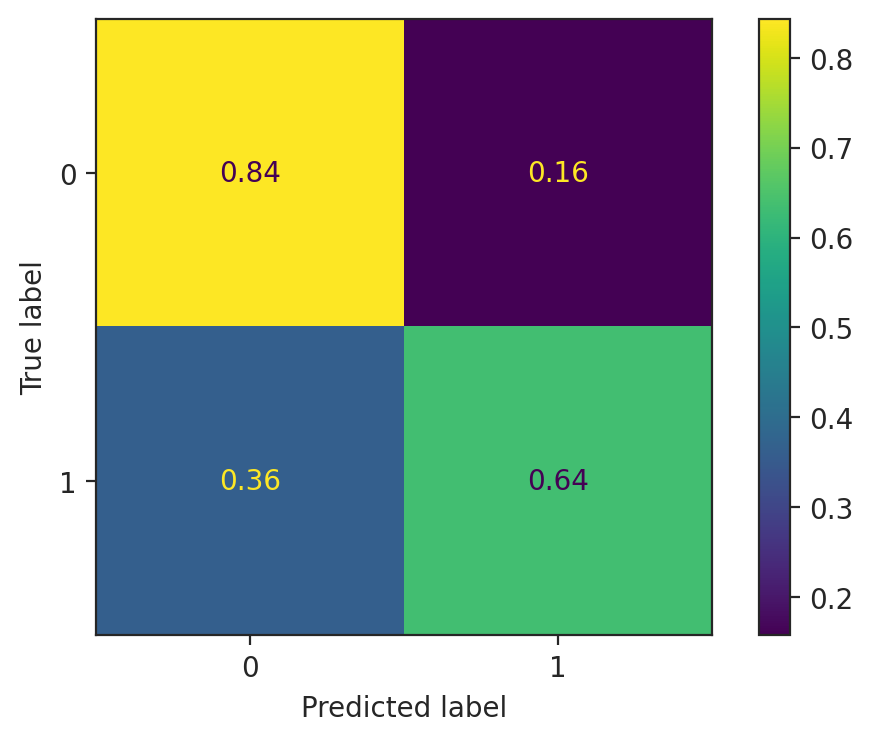

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val_encoded, ensemble_model_ANA.predict(X_val_scale), normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from auto_shap.auto_shap import generate_shap_values

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
!pip install -q shap
import shap
shap.initjs()

In [ ]:
X100 = shap.utils.sample(X_test_scale, 10)

In [ ]:
from auto_shap.auto_shap import produce_shap_values_and_summary_plots

In [ ]:
import pickle

# Save the ensemble_model to a file
with open('ensemble_model_ANA.pkl', 'wb') as model_file:
    pickle.dump(ensemble_model_ANA, model_file)

# **Draw/Not draw ensemble**

In [ ]:
# Define a custom function to apply the transformation
def create_dnd(row):
    if row['FTR'] == 'D':
        return 'D'
    elif row['FTR'] in ['H', 'A']:
        return 'ND'
    else:
        return None

In [ ]:
pl = pd.read_csv('/content/drive/MyDrive/MSc Project - Football Prediction/pl.csv')

In [ ]:
pl.columns

Index(['FTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA', 'MW',
       'Year', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'TGD', 'Prob_D',
       'Elo_Before_Home', 'Elo_Before_Away', 'Days_D', 'form_diff', 'SP_diff',
       'Overall_diff', 'Attack_diff', 'Midfield_diff', 'Defence_diff'],
      dtype='object')

In [ ]:
pl['DND'] = pl.apply(create_dnd, axis=1)

In [ ]:
pl['DND'].value_counts()

ND    3190
D      990
Name: DND, dtype: int64

In [ ]:
pl = pl.drop(columns=['FTR'])

In [ ]:
from sklearn.model_selection import train_test_split


X = pl.drop(columns=['DND'])
y = pl['DND']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

## scaling the data

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer

In [ ]:
# Create transformers
stdscaling_transformer = StandardScaler()
normscaling_transformer = Normalizer()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("std", stdscaling_transformer, std_cols),
        ("norm", normscaling_transformer, norm_cols)
    ],
    remainder='passthrough'
)

# Apply the transformations and convert back to a pandas DataFrame
X_train_scale = preprocessor.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=std_cols + norm_cols)

In [ ]:
X_train_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
0 -0.173319 -0.889917  0.692011 -0.036653 -0.445356  0.584705  0.051751   
1 -0.351295  1.776538 -0.009042  1.980788 -0.149741  0.021679  1.015326   
2  1.250490 -0.889917  0.692011 -0.843630 -0.149741  0.303192  0.372943   
3  0.716562 -0.889917  3.496221 -0.036653 -0.149741  1.147731 -0.590633   
4  0.894538 -0.684805  0.692011 -1.247118  1.032717 -0.541347  2.300093   

         AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
0  0.477479 -0.439816  0.185858  ...         1.844759  0.105250  -0.315976   
1  1.582690  1.210266 -0.594628  ...        -0.393004 -0.078765   0.080183   
2 -0.996136 -1.264857 -0.594628  ...        -0.752759  0.013242   0.099948   
3 -0.259329 -1.264857  0.966343  ...        -0.464125 -0.170773   1.274675   
4  0.845882 -0.439816 -1.375113  ...        -0.045627 -0.078765   0.518573   

    SP_diff        MW      Year  Overall_diff  Attack_diff  Midfield_diff  \
0 -0.971735  0.012914  0.999869     -0.004470    -0.005960      -0.004470   
1 -0.376720  0.007425  0.999952      0.002475     0.004455       0.002970   
2  1.209989  0.006937  0.999925      0.004955     0.006442       0.004460   
3  0.019957  0.017384  0.999848      0.000000    -0.000497      -0.000497   
4  1.011650  0.008937  0.999939      0.002979     0.002979       0.003475   

   Defence_diff  
0     -0.004470  
1      0.002475  
2      0.003964  
3     -0.001490  
4      0.003475  

[5 rows x 35 columns]

In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)
X_val_scale = pd.DataFrame(X_val_scale, columns=std_cols + norm_cols)

X_val_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
0 -0.482909  1.329208 -0.665853 -0.875598  1.940801  0.564645 -0.626034   
1  0.553113 -0.689498  0.698483 -0.471057 -1.102077 -0.822094 -0.295997   
2 -0.655579  2.742302  1.039567 -0.066516 -1.102077 -2.208833 -0.626034   
3  1.071124 -0.285757  0.016315  0.338024  0.115074  0.841993  0.364076   
4  1.071124 -0.891369  1.380651 -0.875598  1.027938  0.564645  0.364076   

         AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
0  1.934754  1.196686 -0.542146  ...        -0.213435 -0.018281  -0.968647   
1 -0.669573 -1.234233  0.226277  ...        -0.544516 -0.106901  -0.094876   
2  3.422941 -0.423927 -0.542146  ...        -0.499536  0.070340  -0.027294   
3  0.074521  0.386379 -1.310568  ...         0.074953 -0.018281   0.212971   
4 -0.297526  0.386379 -1.310568  ...         0.463133 -0.195522  -0.172564   

    SP_diff        MW      Year  Overall_diff  Attack_diff  Midfield_diff  \
0 -0.520457  0.015879  0.999873     -0.000496     0.000000      -0.000992   
1  0.502666  0.011380  0.999924     -0.002474    -0.002969      -0.001979   
2 -1.134331  0.005437  0.999979     -0.001483    -0.000989      -0.002472   
3  0.911915  0.004960  0.999983      0.001984     0.000992       0.001488   
4 -0.520457  0.004453  0.999983      0.001484     0.001484       0.002969   

   Defence_diff  
0     -0.000496  
1     -0.001979  
2     -0.001483  
3      0.001488  
4      0.000990  

[5 rows x 35 columns]

In [ ]:
X_test_scale = preprocessor.fit_transform(X_test)
X_test_scale = pd.DataFrame(X_test_scale, columns=std_cols + norm_cols)

X_test_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
0 -0.561743  0.544859 -0.690512  1.858131 -1.599067  0.662203  1.707644   
1 -0.201469  1.573545 -1.023808  0.693956 -1.021482  0.947713 -1.209775   
2 -0.922016  1.779283 -1.023808  2.246189  0.133687  1.233222  0.411013   
3  0.338942 -1.101039  0.309375 -0.082161 -1.021482  1.518731  3.004274   
4 -0.741879 -0.483827 -0.690512 -0.470219 -0.732690  0.091185 -0.561460   

         AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
0  0.137403 -1.295508  1.093057  ...        -0.059681  0.033114   0.137591   
1  0.873739 -0.474398  1.936043  ...        -0.174328  0.033114   0.174896   
2 -0.598934 -0.474398 -0.592913  ...         0.395013  0.142535  -0.380491   
3  0.137403  1.167824  3.622013  ...        -0.043499  0.142535   0.107122   
4 -0.967103 -0.474398 -0.592913  ...         0.854950  0.033114   0.844239   

    SP_diff        MW      Year  Overall_diff  Attack_diff  Midfield_diff  \
0  1.014738  0.006448  0.999973      0.000992     0.000992       0.002480   
1  2.477192  0.001488  0.999987     -0.002480    -0.001984      -0.001984   
2 -1.520183  0.010885  0.999937     -0.001484    -0.001484      -0.001484   
3  0.429756  0.002978  0.999993      0.000496     0.000496       0.001489   
4  1.014738  0.012864  0.999891      0.003463     0.003463       0.003463   

   Defence_diff  
0      0.001984  
1     -0.002976  
2     -0.000990  
3      0.001489  
4      0.003958  

[5 rows x 35 columns]

In [ ]:
dnd_1_selected_features_logistic = ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'Max>2.5', 'SP_diff',\
       'MW', 'Year']
dnd_1_selected_features_knn = ['HR', 'AvgD', 'Max<2.5', 'Avg<2.5', 'Elo_Before_Home', 'Defence_diff']
dnd_1_selected_features_svm = ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'AC', 'AR', 'AvgH',\
       'Elo_Before_Home']
dnd_1_selected_features_gnb = ['HC', 'AC', 'AY', 'AvgD', 'Year', 'Days_D', 'form_diff']
dnd_1_selected_features_mlp = X_test_scale.columns

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression(multi_class='ovr', solver='liblinear',C = 0.1, class_weight = 'balanced', penalty = 'l1')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10 , weights = 'uniform')

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(C =1, class_weight = 'balanced', degree = 2, gamma = 0.1, kernel = 'rbf')

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB(var_smoothing = 1e-09)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(activation='identity', alpha=0.01, early_stopping=True,\
              learning_rate='adaptive', max_iter=3000)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, selected_features):
        self.selected_features = selected_features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.selected_features]

In [ ]:
# Create custom transformers for each model's selected features
dnd_1_feature_selector_knn = FeatureSelector(dnd_1_selected_features_knn)
dnd_1_feature_selector_svm = FeatureSelector(dnd_1_selected_features_svm)
dnd_1_feature_selector_logistic = FeatureSelector(dnd_1_selected_features_logistic)
dnd_1_feature_selector_nb = FeatureSelector(dnd_1_selected_features_gnb)
dnd_1_feature_selector_mlp = FeatureSelector(dnd_1_selected_features_mlp)


# Fit the transformers on your training data
X_train_knn = dnd_1_feature_selector_knn.fit_transform(X_train_scale)
X_train_svm = dnd_1_feature_selector_svm.fit_transform(X_train_scale)
X_train_logistic = dnd_1_feature_selector_logistic.fit_transform(X_train_scale)
X_train_nb = dnd_1_feature_selector_nb.fit_transform(X_train_scale)
X_train_mlp = dnd_1_feature_selector_mlp.fit_transform(X_train_scale)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical target variables to integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
y_val_encoded = label_encoder.fit_transform(y_val)

# Get the number of classes in the target variable
num_classes = len(label_encoder.classes_)

In [ ]:
num_classes

2

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score

# Initialize StratifiedKFold with SMOTE
skf = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)

# Iterate over the cross-validation folds
for train_idx, val_idx in skf.split(X_train_scale, y_train_encoded):
    X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]  # Use iloc to access data by index
    y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

    # Apply SMOTE to the training fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

    # Transform the features for each model using the respective selectors
    X_train_knn = dnd_1_feature_selector_knn.fit_transform(X_train_fold_resampled)
    X_train_svm = dnd_1_feature_selector_svm.fit_transform(X_train_fold_resampled)
    X_train_logistic = dnd_1_feature_selector_logistic.fit_transform(X_train_fold_resampled)
    X_train_mlp = dnd_1_feature_selector_mlp.fit_transform(X_train_fold_resampled)
    X_train_nb = dnd_1_feature_selector_nb.fit_transform(X_train_fold_resampled)

In [ ]:
# Create a VotingClassifier with the individual models
ensemble_model_DND = VotingClassifier(estimators=[
    ('knn', knn),
    ('svm', svc),
    ('logistic', lg),
    ('gnb',nb),
    ('mlp',mlp)
], voting='hard',n_jobs =-1)  # Adjust the voting strategy as needed


In [ ]:
ensemble_model_DND

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('svm',
                              SVC(C=1, class_weight='balanced', degree=2,
                                  gamma=0.1)),
                             ('logistic',
                              LogisticRegression(C=0.1, class_weight='balanced',
                                                 multi_class='ovr',
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('gnb', GaussianNB()),
                             ('mlp',
                              MLPClassifier(activation='identity', alpha=0.01,
                                            early_stopping=True,
                                            learning_rate='adaptive',
                                            max_iter=3000))],
                 n_jobs=-1)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from itertools import product

# Define the range of weights to consider for each model
weight_ranges = [0.1, 0.2, 0.3, 0.4, 0.5]
num_models = 5  # The number of models in the ensemble

# Initialize StratifiedKFold with SMOTE
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store the best weight combination and accuracy
best_weight_combination = None
best_accuracy = 0.0

# Generate all possible weight combinations
weight_combinations = list(product(weight_ranges, repeat=num_models))

# Create the VotingClassifier with the individual models
ensemble_model_DND_1 = VotingClassifier(estimators=[
    ('knn', knn),
    ('svm', svc),
    ('logistic', lg),
    ('gnb',nb),
    ('mlp',mlp)
], voting='hard',n_jobs =-1) # Hard voting

# Iterate over weight combinations
for weights in weight_combinations:
    # Ensure that the weights sum up to 1 (if needed)
    if sum(weights) != 1.0:
        continue

    # Initialize an array to store accuracy scores for each fold
    fold_accuracies = []

    # Iterate over the cross-validation folds
    for train_idx, val_idx in skf.split(X_train_scale, y_train_encoded):
        X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

        # Apply SMOTE to the training fold
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

        # Set the weights for the current combination
        ensemble_model_DND_1.set_params(weights=weights)

        # Fit the VotingClassifier on the transformed training data
        ensemble_model_DND_1.fit(X_train_fold_resampled, y_train_fold_resampled)

        # Make predictions on the validation set
        y_pred = ensemble_model_DND_1.predict(X_val_fold)
        y_pred_encoded = label_encoder.fit_transform(y_pred)

        # Calculate accuracy (you can use other metrics as well)
        accuracy = accuracy_score(y_val_fold, y_pred_encoded)

        # Append the accuracy score to the list
        fold_accuracies.append(accuracy)

    # Calculate the average accuracy across all folds for this weight combination
    avg_accuracy = np.mean(fold_accuracies)

    # Check if this combination of weights is the best so far
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_weight_combination = weights

# Print the best weight combination and its corresponding accuracy
print("Best Weight Combination:", best_weight_combination)
print("Best Accuracy:", best_accuracy)


Best Weight Combination: (0.1, 0.5, 0.1, 0.1, 0.2)
Best Accuracy: 0.5824299065420561


In [ ]:
# Create a VotingClassifier with the individual models
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from itertools import product
ensemble_model_DND_1 = VotingClassifier(estimators=[
    ('knn', knn),
    ('svm', svc),
    ('logistic', lg),
    ('gnb',nb),
    ('mlp',mlp)
], voting='hard',weights =(0.1, 0.5, 0.1, 0.1, 0.2 ),n_jobs=-1)  # Adjust the voting strategy as needed


# Initialize StratifiedKFold with SMOTE
skf = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)

# Iterate over the cross-validation folds
for train_idx, val_idx in skf.split(X_train_scale, y_train_encoded):
    X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]  # Use iloc to access data by index
    y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

    # Apply SMOTE to the training fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    # Fit the VotingClassifier on the transformed datasets
    ensemble_model_DND_1.fit(X_train_fold_resampled, y_train_fold_resampled)

In [ ]:
import pickle

# Save the ensemble_model to a file
with open('ensemble_model_DND_1.pkl', 'wb') as model_file:
    pickle.dump(ensemble_model_DND_1, model_file)

In [ ]:
ensemble_model_DND_1

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('svm',
                              SVC(C=1, class_weight='balanced', degree=2,
                                  gamma=0.1)),
                             ('logistic',
                              LogisticRegression(C=0.1, class_weight='balanced',
                                                 multi_class='ovr',
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('gnb', GaussianNB()),
                             ('mlp',
                              MLPClassifier(activation='identity', alpha=0.01,
                                            early_stopping=True,
                                            learning_rate='adaptive',
                                            max_iter=3000))],
                 n_jobs=-1, weights=(0.1, 0.5, 0.1, 0.1, 0.2))

In [ ]:
y_val_pred = ensemble_model_DND_1.predict(X_val_scale)
accuracy = accuracy_score(y_val_encoded, y_val_pred)
accuracy

0.57847533632287

In [ ]:
from sklearn.metrics import classification_report
y_pred_ensemble_model = ensemble_model_DND_1.predict(X_val_scale)
class_report_ensemble_model = classification_report(y_val_encoded, y_pred_ensemble_model )
print("\nClassification Report:")
print(class_report_ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.47      0.35       160
           1       0.79      0.61      0.69       509

    accuracy                           0.58       669
   macro avg       0.53      0.54      0.52       669
weighted avg       0.67      0.58      0.61       669



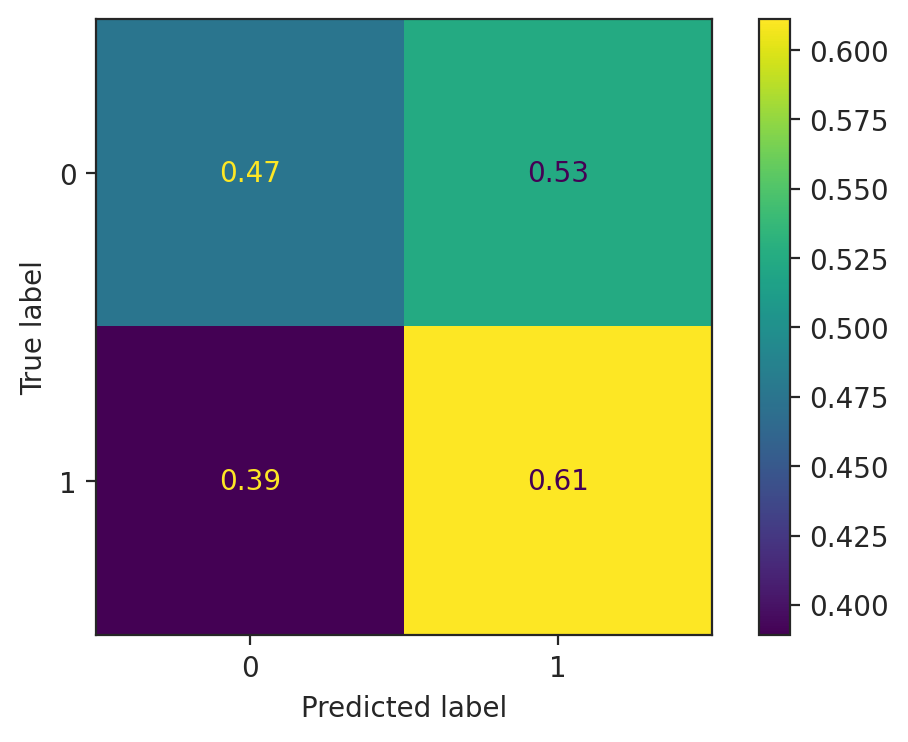

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val_encoded, ensemble_model_DND_1.predict(X_val_scale), normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import classification_report
y_pred_ensemble_model = ensemble_model_DND_1.predict(X_test_scale)
class_report_ensemble_model = classification_report(y_test_encoded, y_pred_ensemble_model )
print("\nClassification Report:")
print(class_report_ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.53      0.38       190
           1       0.82      0.63      0.72       646

    accuracy                           0.61       836
   macro avg       0.56      0.58      0.55       836
weighted avg       0.70      0.61      0.64       836



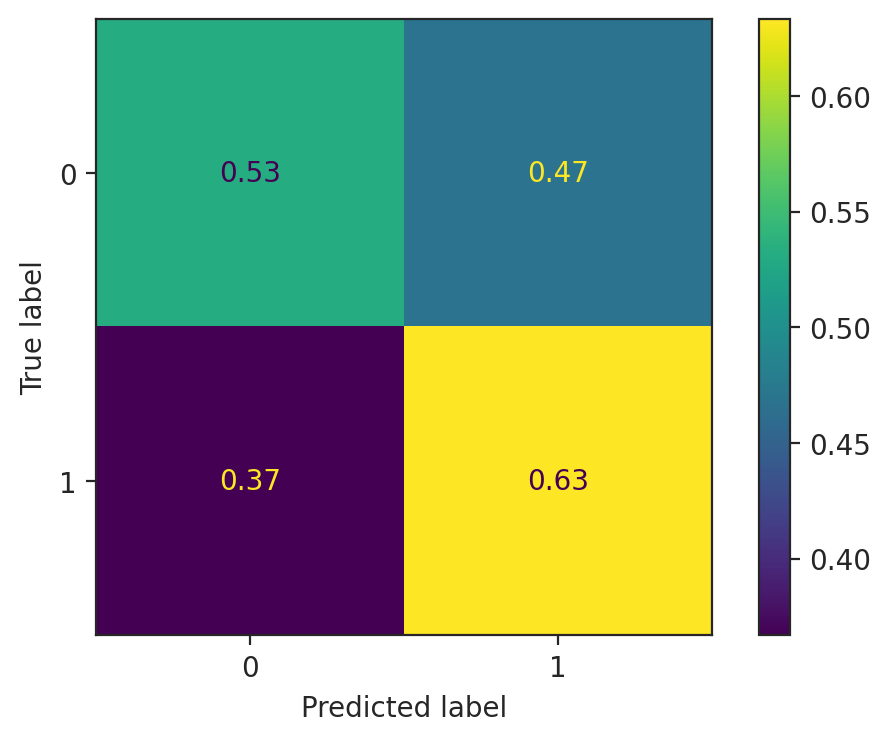

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test_encoded, ensemble_model_DND_1.predict(X_test_scale), normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import f1_score

# Define the range of weights to consider for each model
weight_ranges = [0.1, 0.2, 0.3, 0.4, 0.5]
num_models = 5  # The number of models in the ensemble

# Initialize variables to store the best weight combination and F1 score
best_weight_combination = None
best_f1_score = 0.0

# Generate all possible weight combinations
weight_combinations = list(product(weight_ranges, repeat=num_models))

# Iterate over weight combinations
for weights in weight_combinations:
    # Create a VotingClassifier with the specified weights
    ensemble_model_DND = VotingClassifier(estimators=[
        ('knn', knn),
        ('svm', svc),
        ('logistic', lg),
        ('gnb', nb),
        ('mlp', mlp)
    ], voting='hard', weights=weights)

    # Initialize an array to store F1 scores for each fold
    f1_scores = []

    # Iterate over the cross-validation folds
    for train_idx, val_idx in skf.split(X_train_scale, y_train_encoded):
        X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

        # Apply SMOTE to the training fold
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

        # Fit the VotingClassifier on the transformed datasets
        ensemble_model_DND.fit(X_train_fold_resampled, y_train_fold_resampled)

        # Make predictions on the validation fold
        y_pred = ensemble_model_DND.predict(X_val_fold)
        y_pred_encoded = label_encoder.fit_transform(y_pred)
        # Calculate the F1 score for this fold
        f1 = f1_score(y_val_fold, y_pred_encoded)

        # Append the F1 score to the list
        f1_scores.append(f1)

    # Calculate the average F1 score across all folds for this weight combination
    avg_f1_score = np.mean(f1_scores)

    # Check if this combination of weights is the best so far
    if avg_f1_score > best_f1_score:
        best_f1_score = avg_f1_score
        best_weight_combination = weights

# Print the best weight combination and its corresponding F1 score
print("Best Weight Combination:", best_weight_combination)
print("Best F1 Score:", best_f1_score)


Best Weight Combination: (0.1, 0.5, 0.1, 0.1, 0.1)
Best F1 Score: 0.7637006910620115


In [ ]:
# Create a VotingClassifier with the individual models
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from itertools import product

ensemble_model_DND_2 = VotingClassifier(estimators=[
    ('knn', knn),
    ('svm', svc),
    ('logistic', lg),
    ('gnb',nb),
    ('mlp',mlp)
], voting='hard',weights =(0.1, 0.5, 0.1, 0.1, 0.1),n_jobs=-1)  # Adjust the voting strategy as needed


# Initialize StratifiedKFold with SMOTE
skf = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)

# Iterate over the cross-validation folds
for train_idx, val_idx in skf.split(X_train_scale, y_train_encoded):
    X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]  # Use iloc to access data by index
    y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

    # Apply SMOTE to the training fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    # Fit the VotingClassifier on the transformed datasets
    ensemble_model_DND_2.fit(X_train_fold_resampled, y_train_fold_resampled)

In [ ]:
import pickle

# Save the ensemble_model to a file
with open('ensemble_model_DND_2.pkl', 'wb') as model_file:
    pickle.dump(ensemble_model_DND_2, model_file)

In [ ]:
ensemble_model_DND_2

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('svm',
                              SVC(C=1, class_weight='balanced', degree=2,
                                  gamma=0.1)),
                             ('logistic',
                              LogisticRegression(C=0.1, class_weight='balanced',
                                                 multi_class='ovr',
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('gnb', GaussianNB()),
                             ('mlp',
                              MLPClassifier(activation='identity', alpha=0.01,
                                            early_stopping=True,
                                            learning_rate='adaptive',
                                            max_iter=3000))],
                 n_jobs=-1, weights=(0.1, 0.5, 0.1, 0.1, 0.1))

In [ ]:
from sklearn.metrics import classification_report
y_pred_ensemble_model = ensemble_model_DND_2.predict(X_val_scale)
class_report_ensemble_model = classification_report(y_val_encoded, y_pred_ensemble_model )
print("\nClassification Report:")
print(class_report_ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.29      0.29       160
           1       0.77      0.76      0.77       509

    accuracy                           0.65       669
   macro avg       0.53      0.53      0.53       669
weighted avg       0.66      0.65      0.65       669



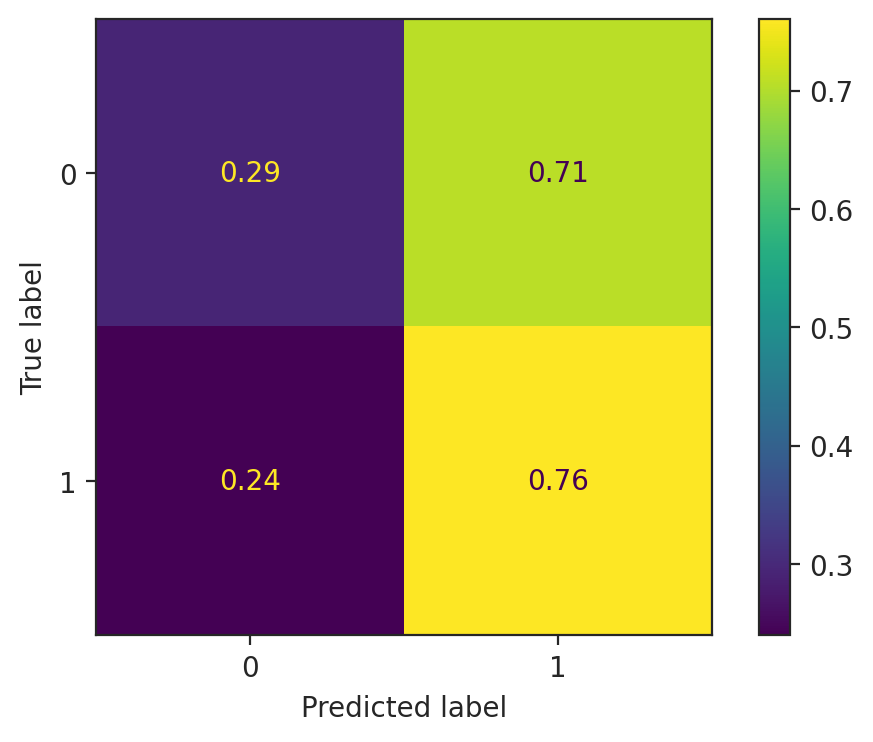

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val_encoded, ensemble_model_DND_2.predict(X_val_scale), normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import classification_report
y_pred_ensemble_model = ensemble_model_DND_1.predict(X_test_scale)
class_report_ensemble_model = classification_report(y_test_encoded, y_pred_ensemble_model )
print("\nClassification Report:")
print(class_report_ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.53      0.38       190
           1       0.82      0.63      0.72       646

    accuracy                           0.61       836
   macro avg       0.56      0.58      0.55       836
weighted avg       0.70      0.61      0.64       836



In [ ]:
from sklearn.metrics import classification_report
y_pred_ensemble_model = ensemble_model_DND_2.predict(X_test_scale)
class_report_ensemble_model = classification_report(y_test_encoded, y_pred_ensemble_model )
print("\nClassification Report:")
print(class_report_ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.33      0.32       190
           1       0.80      0.78      0.79       646

    accuracy                           0.68       836
   macro avg       0.55      0.56      0.56       836
weighted avg       0.69      0.68      0.68       836



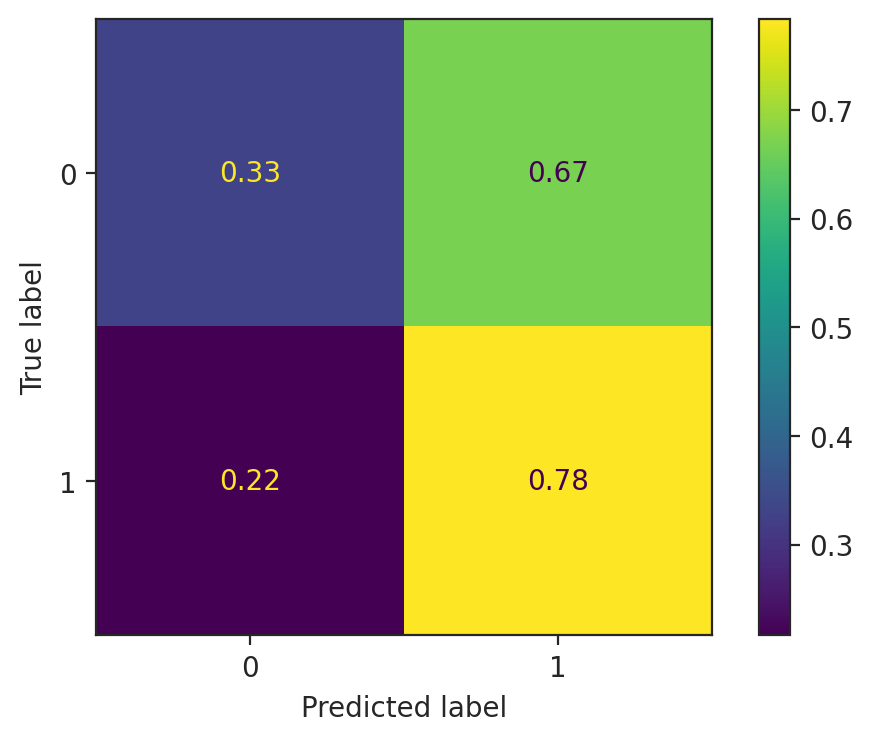

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test_encoded, ensemble_model_DND_2.predict(X_test_scale), normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# **H/A ensemble**

In [ ]:
pl = pd.read_csv('/content/drive/MyDrive/MSc Project - Football Prediction/pl.csv')

In [ ]:
pl = pl.loc[(pl['FTR']=='H') | (pl['FTR']=='A')]

In [ ]:
pl.columns

Index(['FTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR', 'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA', 'MW',
       'Year', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'TGD', 'Prob_D',
       'Elo_Before_Home', 'Elo_Before_Away', 'Days_D', 'form_diff', 'SP_diff',
       'Overall_diff', 'Attack_diff', 'Midfield_diff', 'Defence_diff'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split


X = pl.drop(columns=['FTR'])
y = pl['FTR']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

## scaling the data

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer

In [ ]:
# Create transformers
stdscaling_transformer = StandardScaler()
normscaling_transformer = Normalizer()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("std", stdscaling_transformer, std_cols),
        ("norm", normscaling_transformer, norm_cols)
    ],
    remainder='passthrough'
)

# Apply the transformations and convert back to a pandas DataFrame
X_train_scale = preprocessor.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=std_cols + norm_cols)

In [ ]:
X_train_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
0  1.076889 -0.884041  0.629452 -0.844202 -0.445835 -1.340967  1.728802   
1 -0.354754  0.342697  0.629452 -0.056537  0.442787 -0.197848 -0.573957   
2 -1.249532  1.978349 -0.728953  3.094119 -1.038250  0.373712 -1.231889   
3  0.003156 -0.884041  0.289851 -0.056537 -0.445835  0.659492 -0.244992   
4 -0.891621 -0.884041 -1.068554 -0.844202 -1.334458  0.087932 -0.573957   

         AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
0 -1.363751 -1.213270 -1.364168  ...        -0.263236  0.096672   0.365047   
1  0.110711  1.233651 -0.565926  ...         1.257670  0.007231  -0.916341   
2 -0.257904 -1.213270 -0.565926  ...         0.280108  0.096672   0.030564   
3  1.216558 -0.397630  1.828799  ...         0.234011  0.186113  -0.146502   
4 -0.626520 -0.397630  1.030557  ...         0.332989 -0.171652  -0.153809   

    SP_diff        MW      Year  Overall_diff  Attack_diff  Midfield_diff  \
0  1.177314  0.006951  0.999944      0.004468     0.003972       0.002979   
1 -1.756945  0.008420  0.999947     -0.002476    -0.004457      -0.001981   
2  0.003610  0.002981  0.999975     -0.002484    -0.003477      -0.003974   
3  0.003610  0.005464  0.999984      0.000000     0.000000      -0.000994   
4 -0.583242  0.008910  0.999955      0.001485     0.001980       0.001980   

   Defence_diff  
0      0.004468  
1     -0.002476  
2     -0.002484  
3      0.000497  
4      0.000990  

[5 rows x 35 columns]

In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)
X_val_scale = pd.DataFrame(X_val_scale, columns=std_cols + norm_cols)

X_val_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
0 -1.219631  0.310567 -1.070002  1.067193  1.461710  0.278484 -0.556609   
1 -0.864716 -0.280127 -1.773244 -0.094744  0.563953  0.816502  1.365197   
2 -1.042173  0.113669 -0.718381  0.679881  0.563953  0.547493  0.404294   
3  0.022573  0.901261  1.039725  0.292569  0.863205  1.354519  0.083993   
4  1.619692 -1.264617  0.336483 -0.869368 -0.333804 -0.259533  2.326100   

         AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
0  1.877360  1.226440  0.195149  ...        -0.636771  0.031127  -0.387001   
1 -1.005678  0.420899  1.019289  ...         0.100577  0.031127   0.023050   
2  0.796221  1.226440  1.843429  ...         0.171171  0.031127  -0.064818   
3  0.435841  0.420899  1.019289  ...         0.253941  0.031127  -0.136641   
4 -1.726438 -1.190183  0.195149  ...         0.235121  0.119492  -0.023431   

    SP_diff        MW      Year  Overall_diff  Attack_diff  Midfield_diff  \
0 -0.803081  0.012915  0.999916      0.000497    -0.000497      -0.000993   
1  0.384307  0.004946  0.999983     -0.000495     0.001484      -0.001978   
2 -1.990470  0.000992  0.999985     -0.002479    -0.002975      -0.002975   
3 -0.605183  0.004460  0.999962      0.003469     0.003964       0.004460   
4 -0.258862  0.002472  0.999989      0.001977     0.002472       0.000494   

   Defence_diff  
0     -0.000497  
1     -0.001484  
2     -0.002479  
3      0.002973  
4      0.002472  

[5 rows x 35 columns]

In [ ]:
X_test_scale = preprocessor.fit_transform(X_test)
X_test_scale = pd.DataFrame(X_test_scale, columns=std_cols + norm_cols)

X_test_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
0 -0.756154  1.178175 -1.052597  0.671920 -0.732396 -0.522705  0.022899   
1 -0.241108 -0.712040  0.200892 -0.480459 -0.732396  0.579728 -0.973208   
2 -0.756154  0.968151 -0.739224  0.287794  0.713361  1.406552 -0.641173   
3 -0.927836  0.128055 -0.425852 -0.864585 -0.443244  0.855336 -1.305244   
4  0.788984 -0.712040  0.200892 -0.480459 -1.021547  0.028511  2.679185   

         AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
0  1.225347  0.449775  0.299299  ...         1.425987  0.058629  -0.546098   
1 -0.621939  1.330011  1.938377  ...        -1.602051 -0.136698   0.350888   
2  0.116975 -1.310695  1.118838  ...         1.214887  0.058629  -0.598277   
3 -0.621939  0.449775  1.938377  ...         0.396201  0.058629   0.266866   
4 -1.730310  0.449775  0.299299  ...        -0.820785  0.156292  -0.662859   

    SP_diff        MW      Year  Overall_diff  Attack_diff  Midfield_diff  \
0 -0.786617  0.011904  0.999912     -0.002480    -0.002976      -0.001984   
1 -0.585571  0.009920  0.999949      0.000496     0.001488       0.000992   
2 -1.188709  0.014390  0.999884     -0.002481    -0.001985      -0.002977   
3  1.022799  0.009433  0.999948      0.001489    -0.000993       0.001489   
4  0.218614  0.016863  0.999852     -0.000992    -0.002480      -0.001488   

   Defence_diff  
0     -0.003968  
1     -0.000992  
2     -0.002481  
3      0.002979  
4     -0.001488  

[5 rows x 35 columns]

In [ ]:
ha_selected_features_logistic = ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'AY', 'HR', 'AR',
       'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA', 'Max>2.5', 'Max<2.5',
       'Avg>2.5', 'TGD', 'Prob_D', 'Elo_Before_Home', 'Elo_Before_Away',
       'Days_D', 'form_diff', 'SP_diff', 'MW', 'Year', 'Overall_diff',
       'Attack_diff', 'Midfield_diff', 'Defence_diff']
ha_selected_features_knn = ['HST', 'AST', 'HC', 'AC', 'HR', 'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxA']
ha_selected_features_svm = ['HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HR', 'AvgD', 'AvgA', 'MaxH',
       'MaxD', 'MaxA', 'Year']
ha_selected_features_hgb = ['HS', 'AS', 'HST', 'AST', 'AF', 'HC', 'AC', 'HR', 'AR', 'AvgA', 'MaxH',
       'MW', 'Days_D', 'Attack_diff']


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression(multi_class='ovr', solver='liblinear',C = 0.1, class_weight = 'balanced', penalty = 'l2')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10 , weights = 'uniform')

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(C=1, class_weight='balanced', degree=2, gamma=0.1)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
hgb = HistGradientBoostingClassifier(l2_regularization = 0.1 , learning_rate = 0.1, max_depth  =3,max_iter = 50, max_leaf_nodes = 50,min_samples_leaf  = 20  )

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, selected_features):
        self.selected_features = selected_features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.selected_features]

In [ ]:
# Create custom transformers for each model's selected features
ha_feature_selector_knn = FeatureSelector(ha_selected_features_knn)
ha_feature_selector_svm = FeatureSelector(ha_selected_features_svm)
ha_feature_selector_logistic = FeatureSelector(ha_selected_features_logistic)
ha_feature_selector_hgb = FeatureSelector(ha_selected_features_hgb)



# Fit the transformers on your training data
X_train_knn = ha_feature_selector_knn.fit_transform(X_train_scale)
X_train_svm = ha_feature_selector_svm.fit_transform(X_train_scale)
X_train_logistic = ha_feature_selector_logistic.fit_transform(X_train_scale)
X_train_hgb = ha_feature_selector_hgb.fit_transform(X_train_scale)


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical target variables to integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
y_val_encoded = label_encoder.fit_transform(y_val)

# Get the number of classes in the target variable
num_classes = len(label_encoder.classes_)

In [ ]:
num_classes

2

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  make_scorer,f1_score,precision_score,recall_score

# Initialize StratifiedKFold with SMOTE
skf = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)

# Iterate over the cross-validation folds
for train_idx, val_idx in skf.split(X_train_scale, y_train_encoded):
    X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]  # Use iloc to access data by index
    y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

    # Apply SMOTE to the training fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

    # Transform the features for each model using the respective selectors
    X_train_knn = ha_feature_selector_knn.fit_transform(X_train_fold_resampled)
    X_train_svm = ha_feature_selector_svm.fit_transform(X_train_fold_resampled)
    X_train_logistic = ha_feature_selector_logistic.fit_transform(X_train_fold_resampled)
    X_train_hgb = ha_feature_selector_hgb.fit_transform(X_train_fold_resampled)

In [ ]:
# Create a VotingClassifier with the individual models
ensemble_model_HA = VotingClassifier(estimators=[
    ('knn', knn),
    ('svm', svc),
    ('logistic', lg),
    ('hgb',hgb),
], voting='hard',n_jobs =-1)  # Adjust the voting strategy as needed


In [ ]:
ensemble_model_HA

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('svm',
                              SVC(C=1, class_weight='balanced', degree=2,
                                  gamma=0.1)),
                             ('logistic',
                              LogisticRegression(C=0.1, class_weight='balanced',
                                                 multi_class='ovr',
                                                 solver='liblinear')),
                             ('hgb',
                              HistGradientBoostingClassifier(l2_regularization=0.1,
                                                             max_depth=3,
                                                             max_iter=50,
                                                             max_leaf_nodes=50))],
                 n_jobs=-1)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from itertools import product

# Define the range of weights to consider for each model
weight_ranges = [0.1, 0.2, 0.3, 0.4]
num_models = 4  # The number of models in the ensemble

# Initialize StratifiedKFold with SMOTE
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store the best weight combination and accuracy
best_weight_combination = None
best_accuracy = 0.0

# Generate all possible weight combinations
weight_combinations = list(product(weight_ranges, repeat=num_models))

# Create the VotingClassifier with the individual models
ensemble_model_HA = VotingClassifier(estimators=[
    ('knn', knn),
    ('svm', svc),
    ('logistic', lg),
    ('hgb',hgb),
], voting='hard',n_jobs =-1) # Hard voting

# Iterate over weight combinations
for weights in weight_combinations:
    # Ensure that the weights sum up to 1 (if needed)
    if sum(weights) != 1.0:
        continue

    # Initialize an array to store accuracy scores for each fold
    fold_accuracies = []

    # Iterate over the cross-validation folds
    for train_idx, val_idx in skf.split(X_train_scale, y_train_encoded):
        X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

        # Apply SMOTE to the training fold
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

        # Set the weights for the current combination
        ensemble_model_HA.set_params(weights=weights)

        # Fit the VotingClassifier on the transformed training data
        ensemble_model_HA.fit(X_train_fold_resampled, y_train_fold_resampled)

        # Make predictions on the validation set
        y_pred = ensemble_model_HA.predict(X_val_fold)
        y_pred_encoded = label_encoder.fit_transform(y_pred)

        # Calculate accuracy (you can use other metrics as well)
        accuracy = accuracy_score(y_val_fold, y_pred_encoded)

        # Append the accuracy score to the list
        fold_accuracies.append(accuracy)

    # Calculate the average accuracy across all folds for this weight combination
    avg_accuracy = np.mean(fold_accuracies)

    # Check if this combination of weights is the best so far
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_weight_combination = weights

# Print the best weight combination and its corresponding accuracy
print("Best Weight Combination:", best_weight_combination)
print("Best Accuracy:", best_accuracy)


Best Weight Combination: (0.1, 0.3, 0.3, 0.3)
Best Accuracy: 0.7986181024977228


In [ ]:
# Create a VotingClassifier with the individual models
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from itertools import product
ensemble_model_HA = VotingClassifier(estimators=[
    ('knn', knn),
    ('svm', svc),
    ('logistic', lg),
    ('hgb',hgb),
], voting='hard',n_jobs = -1,weights =(0.1, 0.3, 0.3, 0.3 ))  # Adjust the voting strategy as needed


# Initialize StratifiedKFold with SMOTE
skf = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)

# Iterate over the cross-validation folds
for train_idx, val_idx in skf.split(X_train_scale, y_train_encoded):
    X_train_fold, X_val_fold = X_train_scale.iloc[train_idx], X_train_scale.iloc[val_idx]  # Use iloc to access data by index
    y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

    # Apply SMOTE to the training fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    # Fit the VotingClassifier on the transformed datasets
    ensemble_model_HA.fit(X_train_fold_resampled, y_train_fold_resampled)

In [ ]:
ensemble_model_HA

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('svm',
                              SVC(C=1, class_weight='balanced', degree=2,
                                  gamma=0.1)),
                             ('logistic',
                              LogisticRegression(C=0.1, class_weight='balanced',
                                                 multi_class='ovr',
                                                 solver='liblinear')),
                             ('hgb',
                              HistGradientBoostingClassifier(l2_regularization=0.1,
                                                             max_depth=3,
                                                             max_iter=50,
                                                             max_leaf_nodes=50))],
                 n_jobs=-1, weights=(0.1, 0.3, 0.3, 0.3))

In [ ]:
y_train.value_counts()

H    1208
A     833
Name: FTR, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
y_pred_ensemble_model = ensemble_model_HA.predict(X_val_scale)
class_report_ensemble_model = classification_report(y_val_encoded, y_pred_ensemble_model )
print("\nClassification Report:")
print(class_report_ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       209
           1       0.86      0.84      0.85       302

    accuracy                           0.82       511
   macro avg       0.82      0.82      0.82       511
weighted avg       0.82      0.82      0.82       511



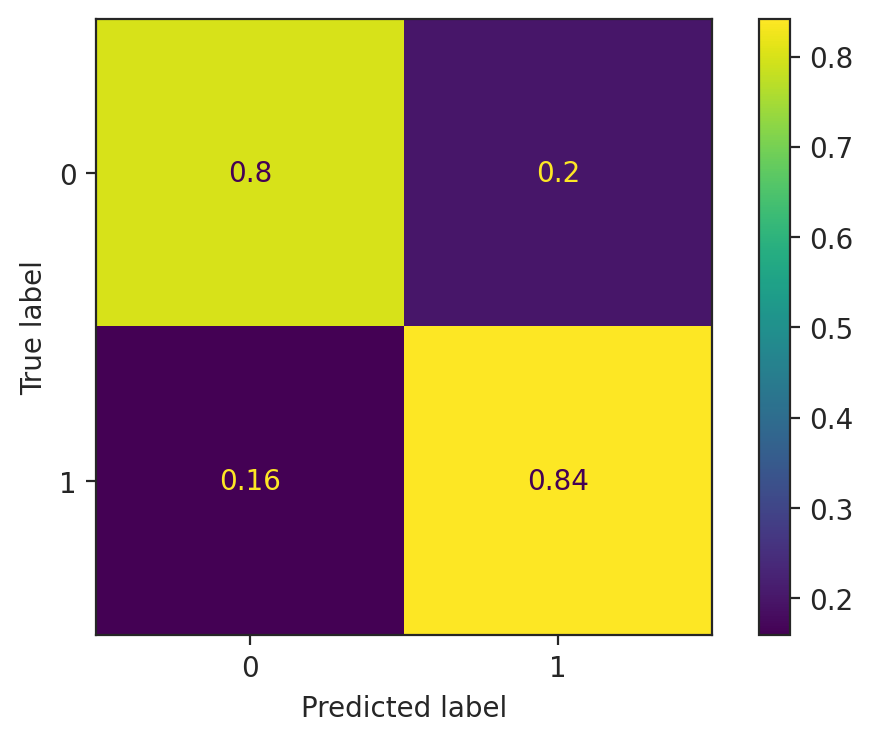

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val_encoded, ensemble_model_HA.predict(X_val_scale), normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import classification_report
y_pred_ensemble_model = ensemble_model_HA.predict(X_test_scale)
class_report_ensemble_model = classification_report(y_test_encoded, y_pred_ensemble_model )
print("\nClassification Report:")
print(class_report_ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       270
           1       0.85      0.81      0.83       368

    accuracy                           0.81       638
   macro avg       0.81      0.81      0.81       638
weighted avg       0.81      0.81      0.81       638



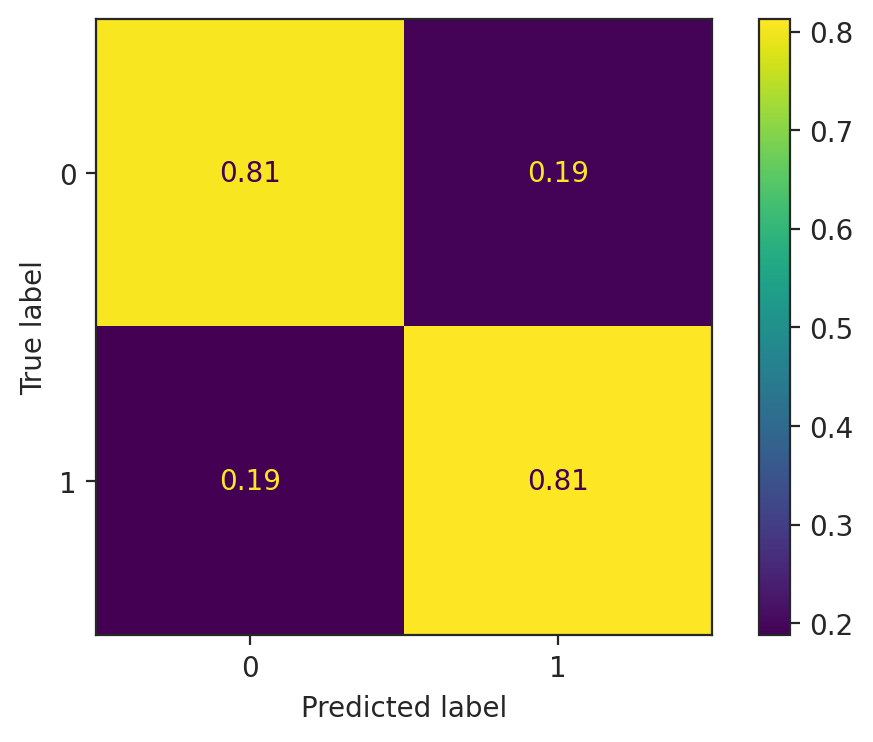

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test_encoded, ensemble_model_HA.predict(X_test_scale), normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# **pickling**

In [ ]:
import pickle

# Save the ensemble_model to a file
with open('ensemble_model_DND_2.pkl', 'wb') as model_file:
    pickle.dump(ensemble_model_DND_2, model_file)

In [ ]:
import pickle

# Save the ensemble_model to a file
with open('ensemble_model_DND_1.pkl', 'wb') as model_file:
    pickle.dump(ensemble_model_DND_1, model_file)

In [ ]:
import pickle

# Save the ensemble_model to a file
with open('ensemble_model_HNH.pkl', 'wb') as model_file:
    pickle.dump(ensemble_model_HNH, model_file)

In [ ]:
import pickle

# Save the ensemble_model to a file
with open('ensemble_model_ANA.pkl', 'wb') as model_file:
    pickle.dump(ensemble_model_ANA, model_file)

In [ ]:
import pickle

# Save the ensemble_model to a file
with open('ensemble_model_HA.pkl', 'wb') as model_file:
    pickle.dump(ensemble_model_HA, model_file)

# **Defining the three class function**

In [ ]:
# Create a dictionary of feature selectors for ensemble_model_HNH
feature_selectors_dict = {
    'ensemble_model_HNH': [
        hnh_feature_selector_svm,
        hnh_feature_selector_histgradboost,
        hnh_feature_selector_logistic,
        hnh_feature_selector_mlp
    ],
    'ensemble_model_ANA': [
        ana_feature_selector_knn ,
        ana_feature_selector_histgradboost,
        ana_feature_selector_logistic,
        ana_feature_selector_nb
    ],  # Map other ensemble models as needed
    'ensemble_model_DND_1': [
        dnd_1_feature_selector_knn ,
        dnd_1_feature_selector_svm ,
        dnd_1_feature_selector_logistic,
        dnd_1_feature_selector_nb,
        dnd_1_feature_selector_mlp
    ],
    'ensemble_model_HA': [
        ha_feature_selector_knn  ,
        ha_feature_selector_svm,
        ha_feature_selector_logistic,
        ha_feature_selector_hgb
    ]
}



In [ ]:
ensemble_models_dict = {
    'ensemble_model_HNH': ensemble_model_HNH,
    'ensemble_model_ANA': ensemble_model_ANA,
    'ensemble_model_DND_1': ensemble_model_DND_1,
    'ensemble_model_HA': ensemble_model_HA
}

In [ ]:
pl = pd.read_csv('/content/drive/MyDrive/MSc Project - Football Prediction/pl.csv')

In [ ]:
from sklearn.model_selection import train_test_split


X = pl.drop(columns=['FTR'])
y = pl['FTR']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [ ]:
norm_cols=['MW', 'Year','Overall_diff', 'Attack_diff',\
       'Midfield_diff', 'Defence_diff']

In [ ]:
std_cols = [col for col in X_train.columns if col not in norm_cols]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer

In [ ]:
# Create transformers
stdscaling_transformer = StandardScaler()
normscaling_transformer = Normalizer()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("std", stdscaling_transformer, std_cols),
        ("norm", normscaling_transformer, norm_cols)
    ],
    remainder='passthrough'
)

# Apply the transformations and convert back to a pandas DataFrame
X_train_scale = preprocessor.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=std_cols + norm_cols)

In [ ]:
X_train_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
0 -1.396419  0.555852 -0.342593  1.196182  0.439857 -0.258782 -0.921011   
1  2.468657 -0.466638  1.760932 -0.838788 -1.043524 -1.097526  0.692840   
2  1.238860  0.146856  0.709170 -0.431794 -0.450171 -2.495432  0.370070   
3 -1.396419  1.373844 -1.394355 -0.024800  0.736533  1.139124 -1.243782   
4 -0.517992  0.351354 -0.693180 -0.024800  0.143181 -0.258782 -0.598241   

         AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
0 -0.630620  1.220044 -0.585084  ...         1.341247  0.093985  -2.073264   
1 -0.630620 -0.421615 -1.357973  ...         0.841969 -0.093076  -0.088650   
2 -0.630620 -0.421615 -1.357973  ...        -0.407460 -0.093076   0.087822   
3  2.332769  1.220044  0.960694  ...         2.074483  0.093985  -0.902241   
4  0.480651 -0.421615 -0.585084  ...         0.171091  0.187516  -0.005569   

    SP_diff        MW      Year  Overall_diff  Attack_diff  Midfield_diff  \
0 -0.171657  0.017384  0.999826     -0.002980    -0.003973      -0.002980   
1 -0.567289  0.005932  0.999979      0.000494    -0.001483       0.001977   
2  2.004324  0.001978  0.999969      0.003462     0.002473       0.004451   
3 -0.171657  0.013881  0.999896     -0.001983    -0.001487      -0.001983   
4 -1.160738  0.008436  0.999957     -0.001489    -0.001489      -0.000993   

   Defence_diff  
0     -0.003477  
1      0.000989  
2      0.004451  
3     -0.002479  
4     -0.002978  

[5 rows x 35 columns]

In [ ]:
X_val_scale = preprocessor.fit_transform(X_val)
X_val_scale = pd.DataFrame(X_val_scale, columns=std_cols + norm_cols)

X_val_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
0 -0.163338  0.073125 -1.073667  0.280915  0.426005  0.298330  1.022407   
1  0.018481 -0.336252 -0.049985 -0.503771 -0.473040 -0.557024 -0.271192   
2  1.654851 -1.769070  0.291242 -0.896114 -0.173358  0.868566  1.992606   
3  0.563938 -1.564382  0.632469 -1.288458 -1.671767 -1.127260  0.375608   
4  0.563938 -1.155005  0.291242 -0.503771  0.426005  1.153684  2.639406   

         AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
0  0.070750 -0.497892 -1.378599  ...        -0.300668  0.029292  -0.021987   
1  0.070750 -0.497892  0.219811  ...        -0.787930 -0.054452   0.756453   
2 -1.021518  1.159272  4.215836  ...         0.265328  0.029292   0.266892   
3 -1.385607 -0.497892 -0.579394  ...        -0.183157  0.113035   0.124521   
4 -0.657428  2.816437  1.019016  ...        -0.435738 -0.054452  -0.104982   

    SP_diff        MW      Year  Overall_diff  Attack_diff  Midfield_diff  \
0 -0.758409  0.003968  0.999990     -0.000496    -0.001488      -0.000992   
1  1.721466  0.010874  0.999923      0.002966     0.002471       0.003954   
2  0.688185  0.009910  0.999913      0.003964     0.005946       0.003964   
3  1.721466  0.005934  0.999963      0.002967     0.002473       0.003956   
4  0.481529  0.005462  0.999984      0.000497     0.000993       0.000000   

   Defence_diff  
0      0.000000  
1      0.002471  
2      0.002973  
3      0.002967  
4      0.000497  

[5 rows x 35 columns]

In [ ]:
X_test_scale = preprocessor.fit_transform(X_test)
X_test_scale = pd.DataFrame(X_test_scale, columns=std_cols + norm_cols)

X_test_scale.head(5)

HS        AS       HST       AST        HF        AF        HC  \
0 -0.561743  0.544859 -0.690512  1.858131 -1.599067  0.662203  1.707644   
1 -0.201469  1.573545 -1.023808  0.693956 -1.021482  0.947713 -1.209775   
2 -0.922016  1.779283 -1.023808  2.246189  0.133687  1.233222  0.411013   
3  0.338942 -1.101039  0.309375 -0.082161 -1.021482  1.518731  3.004274   
4 -0.741879 -0.483827 -0.690512 -0.470219 -0.732690  0.091185 -0.561460   

         AC        HY        AY  ...  Elo_Before_Away    Days_D  form_diff  \
0  0.137403 -1.295508  1.093057  ...        -0.059681  0.033114   0.137591   
1  0.873739 -0.474398  1.936043  ...        -0.174328  0.033114   0.174896   
2 -0.598934 -0.474398 -0.592913  ...         0.395013  0.142535  -0.380491   
3  0.137403  1.167824  3.622013  ...        -0.043499  0.142535   0.107122   
4 -0.967103 -0.474398 -0.592913  ...         0.854950  0.033114   0.844239   

    SP_diff        MW      Year  Overall_diff  Attack_diff  Midfield_diff  \
0  1.014738  0.006448  0.999973      0.000992     0.000992       0.002480   
1  2.477192  0.001488  0.999987     -0.002480    -0.001984      -0.001984   
2 -1.520183  0.010885  0.999937     -0.001484    -0.001484      -0.001484   
3  0.429756  0.002978  0.999993      0.000496     0.000496       0.001489   
4  1.014738  0.012864  0.999891      0.003463     0.003463       0.003463   

   Defence_diff  
0      0.001984  
1     -0.002976  
2     -0.000990  
3      0.001489  
4      0.003958  

[5 rows x 35 columns]

In [ ]:
y_train.value_counts()

H    1193
A     842
D     640
Name: FTR, dtype: int64

In [ ]:
y_val.value_counts()

H    299
A    210
D    160
Name: FTR, dtype: int64

In [ ]:
y_test.value_counts()

H    386
A    260
D    190
Name: FTR, dtype: int64

In [ ]:
X_val_scale.columns

Index(['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'AvgH', 'AvgD', 'AvgA', 'MaxH', 'MaxD', 'MaxA', 'Max>2.5',
       'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'TGD', 'Prob_D', 'Elo_Before_Home',
       'Elo_Before_Away', 'Days_D', 'form_diff', 'SP_diff', 'MW', 'Year',
       'Overall_diff', 'Attack_diff', 'Midfield_diff', 'Defence_diff'],
      dtype='object')

### placing home first

In [ ]:
def cascading_predict(data_point, ensemble_models_dict):
    # Initial prediction with ensemble_model_HNH
    hnh_prediction = ensemble_models_dict['ensemble_model_HNH'].predict(data_point.values.reshape(1, -1))

    if hnh_prediction == 0:  # 'H'
        return 'H'
    else:
        # Pass to ensemble_model_ANA
        ana_prediction = ensemble_models_dict['ensemble_model_ANA'].predict(data_point.values.reshape(1, -1))

        if ana_prediction == 0:  # 'A'
            return 'A'
        else:
            # Pass to ensemble_model_DND
            dnd_prediction = ensemble_models_dict['ensemble_model_DND_1'].predict(data_point.values.reshape(1, -1))

            if dnd_prediction == 0:  # 'D'
                return 'D'
            else:
                # Pass to ensemble_model_HA
                ha_prediction = ensemble_models_dict['ensemble_model_HA'].predict(data_point.values.reshape(1, -1))

                if ha_prediction == 0:
                    return 'A'
                else:
                    return 'H'



In [ ]:
# Pickle the cascading_predict function
with open('cascading_predict.pkl', 'wb') as file:
    pickle.dump(cascading_predict, file)

In [ ]:
# Initialize an empty list to store predictions
predictions = []

# Loop through each row in X_val_scale
for index, data_point in X_val_scale.iterrows():
    prediction = cascading_predict(data_point, ensemble_models_dict)
    predictions.append(prediction)

# `predictions` now contains the predicted labels for each row in X_val_scale


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base

In [ ]:
y_val_encoded = label_encoder.fit_transform(y_val)

In [ ]:
y_val_pred = np.array(predictions)

In [ ]:
len(y_val_pred)

669

In [ ]:
class_report_ensemble_model = classification_report(y_val, y_val_pred)
print("\nClassification Report:")
print(class_report_ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           A       0.57      0.81      0.67       210
           D       0.61      0.12      0.20       160
           H       0.71      0.81      0.76       299

    accuracy                           0.64       669
   macro avg       0.63      0.58      0.54       669
weighted avg       0.64      0.64      0.60       669



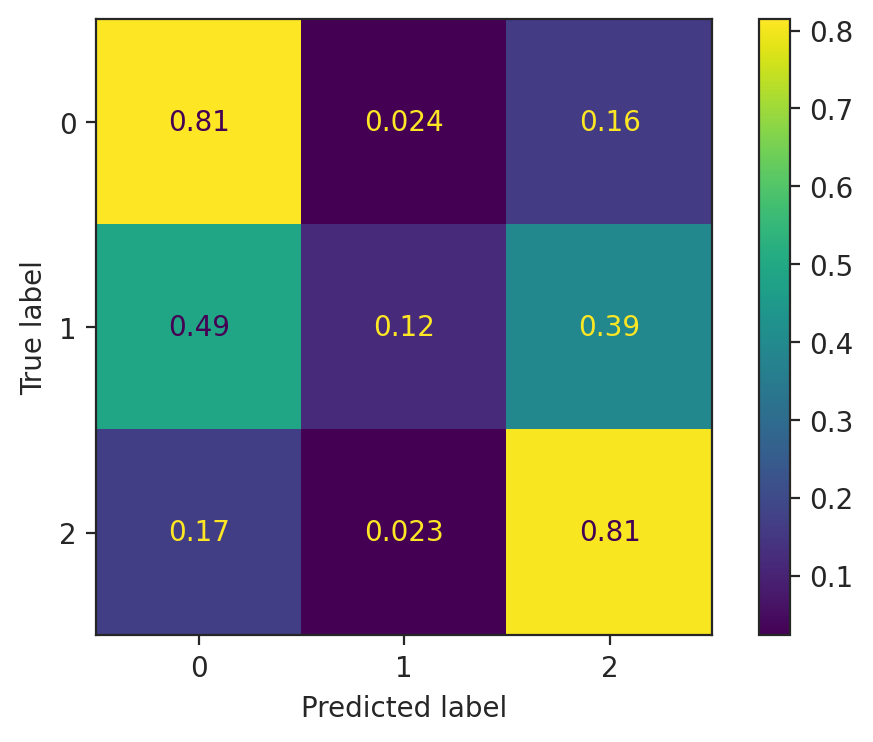

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val, y_val_pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
y_test

1263    A
1163    D
3250    A
810     D
3295    H
       ..
3336    H
1878    H
910     H
2194    D
2834    H
Name: FTR, Length: 836, dtype: object

In [ ]:
# Initialize an empty list to store predictions
predictions = []

# Loop through each row in X_test_scale
for index, data_point in X_test_scale.iterrows():
    prediction = cascading_predict(data_point, ensemble_models_dict)
    predictions.append(prediction)

# `predictions` now contains the predicted labels for each row in X_test_scale

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.

In [ ]:
y_test_pred = np.array(predictions)

In [ ]:
len(y_test_pred)

836

In [ ]:
len(y_test)

836

In [ ]:
class_report_ensemble_model = classification_report(y_test, y_test_pred)
print("\nClassification Report:")
print(class_report_ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           A       0.55      0.77      0.64       260
           D       0.21      0.04      0.07       190
           H       0.71      0.80      0.75       386

    accuracy                           0.62       836
   macro avg       0.49      0.54      0.49       836
weighted avg       0.55      0.62      0.56       836



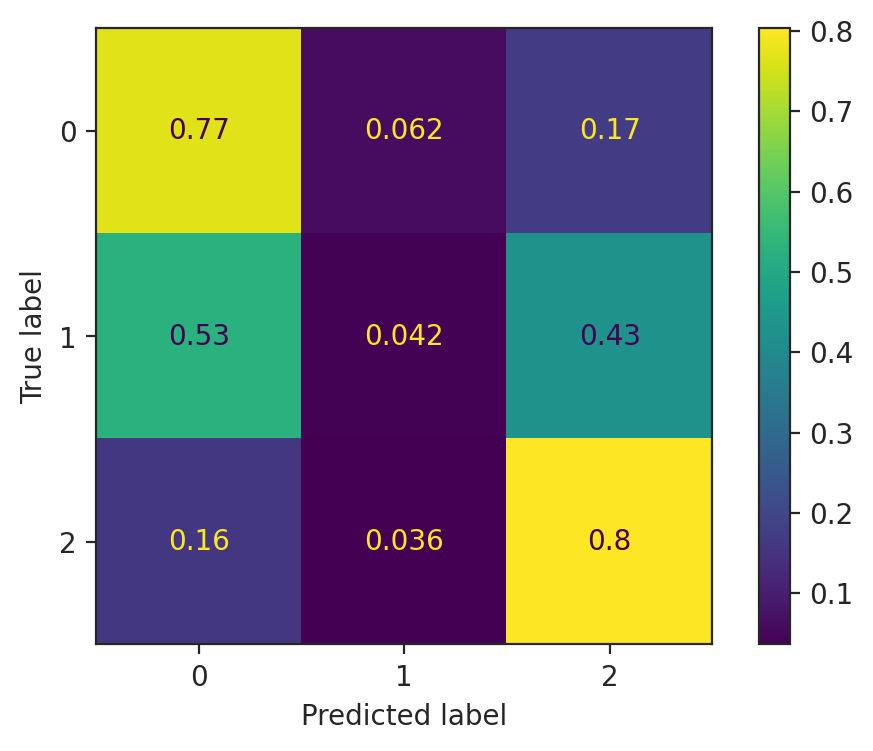

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_test_pred, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### placing away first

In [ ]:
def predict_cascading(X_val_scale):
    predictions = []

    ensemble_models_dict = {
    'ensemble_model_HNH': ensemble_model_HNH,
    'ensemble_model_ANA': ensemble_model_ANA,
    'ensemble_model_DND_2': ensemble_model_DND_2,
    'ensemble_model_HA': ensemble_model_HA
}

    def cascading_predict(data_point):
        ana_prediction = ensemble_models_dict['ensemble_model_ANA'].predict(data_point.values.reshape(1, -1))

        if ana_prediction == 0:
            return 'A'
        else:
            hnh_prediction = ensemble_models_dict['ensemble_model_HNH'].predict(data_point.values.reshape(1, -1))

            if hnh_prediction == 0:
                return 'H'
            else:
                dnd_prediction = ensemble_models_dict['ensemble_model_DND_2'].predict(data_point.values.reshape(1, -1))

                if dnd_prediction == 0:
                    return 'D'
                else:
                    ha_prediction = ensemble_models_dict['ensemble_model_HA'].predict(data_point.values.reshape(1, -1))

                    if ha_prediction == 0:
                        return 'A'
                    else:
                        return 'H'

    for index, data_point in X_val_scale.iterrows():
        prediction = cascading_predict(data_point)
        predictions.append(prediction)

    predictions = np.array(predictions)
    return predictions




In [ ]:
with open('predict_cascading.pkl', 'wb') as file:
    pickle.dump(predict_cascading, file)

In [ ]:
# To use the function:
predictions = predict_cascading(X_val_scale)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-pack

In [ ]:
class_report_ensemble_model = classification_report(y_val, predictions)
print("\nClassification Report:")
print(class_report_ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           A       0.51      0.86      0.64       210
           D       0.71      0.11      0.18       160
           H       0.73      0.70      0.71       299

    accuracy                           0.61       669
   macro avg       0.65      0.56      0.51       669
weighted avg       0.65      0.61      0.56       669



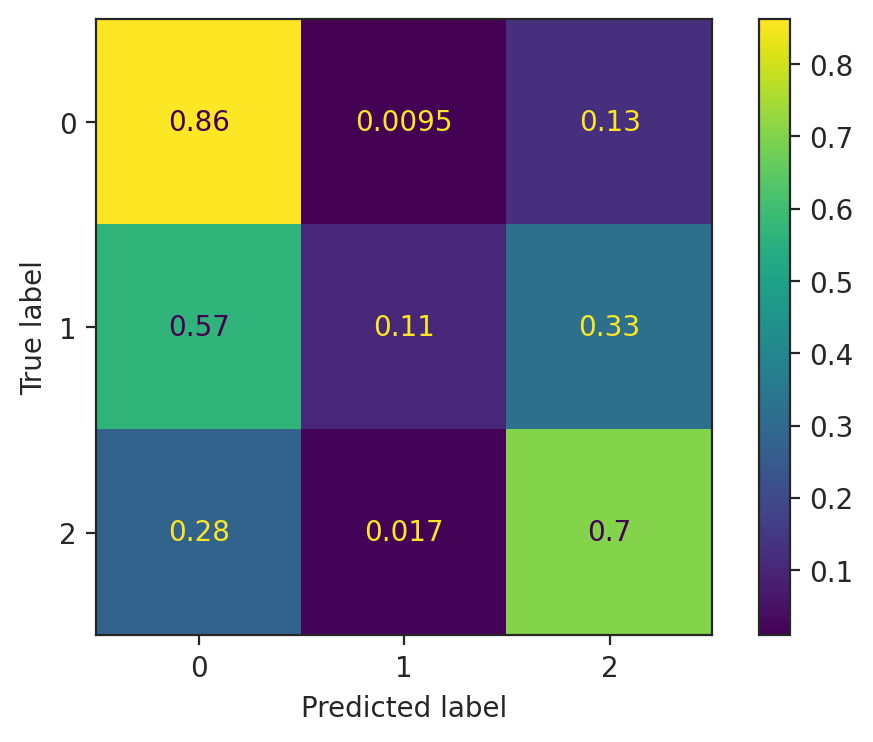

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val, predictions, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# To use the function:
predictions = predict_cascading(X_test_scale)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ba

In [ ]:
class_report_ensemble_model = classification_report(y_test, predictions)
print("\nClassification Report:")
print(class_report_ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           A       0.51      0.83      0.63       260
           D       0.20      0.03      0.05       190
           H       0.72      0.72      0.72       386

    accuracy                           0.60       836
   macro avg       0.48      0.52      0.46       836
weighted avg       0.54      0.60      0.54       836



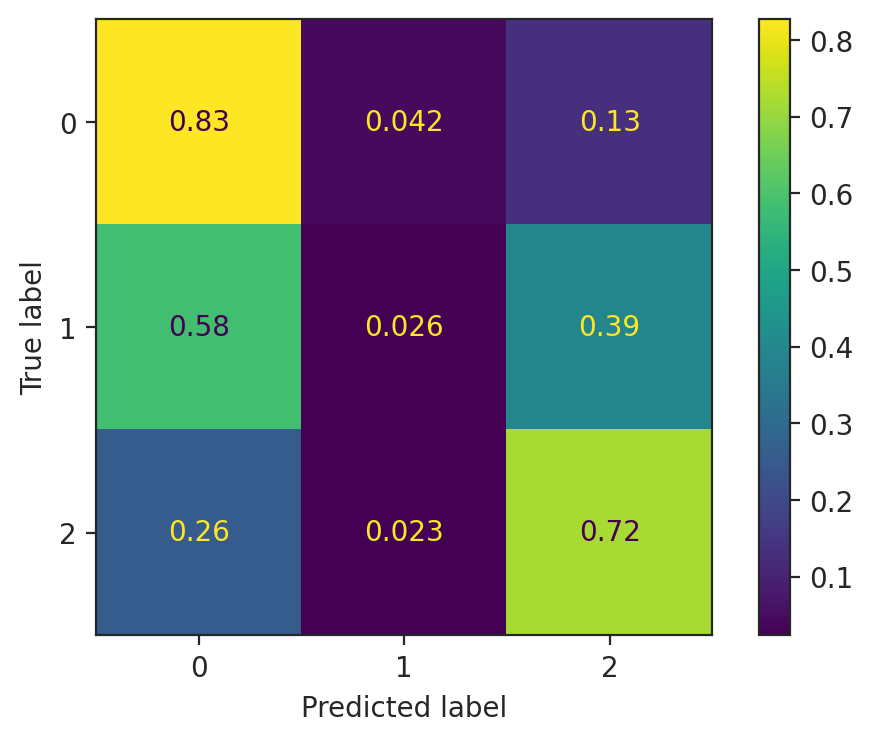

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test, predictions, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### placing draw first

In [ ]:
def predict_cascading(X_val_scale):
    predictions = []

    ensemble_models_dict = {
    'ensemble_model_HNH': ensemble_model_HNH,
    'ensemble_model_ANA': ensemble_model_ANA,
    'ensemble_model_DND_2': ensemble_model_DND_2,
    'ensemble_model_HA': ensemble_model_HA
}

    def cascading_predict(data_point):
        dnd_prediction = ensemble_models_dict['ensemble_model_DND_2'].predict(data_point.values.reshape(1, -1))

        if dnd_prediction == 0:
            return 'D'
        else:
            ana_prediction = ensemble_models_dict['ensemble_model_ANA'].predict(data_point.values.reshape(1, -1))

            if ana_prediction == 0:
                return 'A'
            else:
                hnh_prediction = ensemble_models_dict['ensemble_model_HNH'].predict(data_point.values.reshape(1, -1))

                if dnd_prediction == 0:
                    return 'H'
                else:
                    ha_prediction = ensemble_models_dict['ensemble_model_HA'].predict(data_point.values.reshape(1, -1))

                    if ha_prediction == 0:
                        return 'A'
                    else:
                        return 'H'

    for index, data_point in X_val_scale.iterrows():
        prediction = cascading_predict(data_point)
        predictions.append(prediction)

    predictions = np.array(predictions)
    return predictions




In [ ]:
import pickle

# Load the pickled model
with open('/content/ensemble_model_ANA.pkl', 'rb') as file:
    ensemble_model_ANA = pickle.load(file)


In [ ]:
import pickle

# Load the pickled model
with open('/content/ensemble_model_DND_2.pkl', 'rb') as file:
    ensemble_model_DND_2 = pickle.load(file)


In [ ]:
import pickle

# Load the pickled model
with open('/content/ensemble_model_HA.pkl', 'rb') as file:
    ensemble_model_HA = pickle.load(file)

In [ ]:
import pickle

# Load the pickled model
with open('/content/ensemble_model_HNH.pkl', 'rb') as file:
   ensemble_model_HNH = pickle.load(file)

In [ ]:
import pickle

# Load the pickled model
with open('/content/predict_cascading.pkl', 'rb') as file:
    predict_cascading = pickle.load(file)



In [ ]:
# To use the function:
predictions = predict_cascading(X_val_scale)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439:

In [ ]:
from sklearn.metrics import classification_report
class_report_ensemble_model = classification_report(y_val, predictions)
print("\nClassification Report:")
print(class_report_ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           A       0.62      0.72      0.67       210
           D       0.57      0.71      0.63       160
           H       0.84      0.64      0.73       299

    accuracy                           0.68       669
   macro avg       0.68      0.69      0.67       669
weighted avg       0.71      0.68      0.68       669



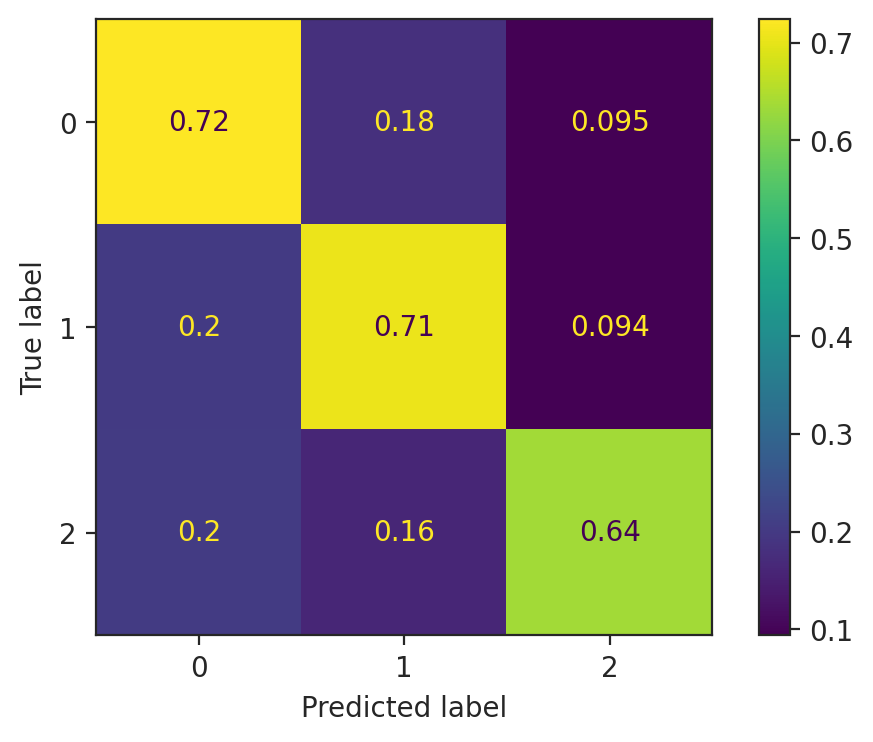

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_val, predictions, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# To use the function:
predictions = predict_cascading(X_test_scale)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skl

In [ ]:
class_report_ensemble_model = classification_report(y_test, predictions)
print("\nClassification Report:")
print(class_report_ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           A       0.55      0.68      0.60       260
           D       0.31      0.33      0.32       190
           H       0.75      0.60      0.67       386

    accuracy                           0.56       836
   macro avg       0.54      0.54      0.53       836
weighted avg       0.59      0.56      0.57       836



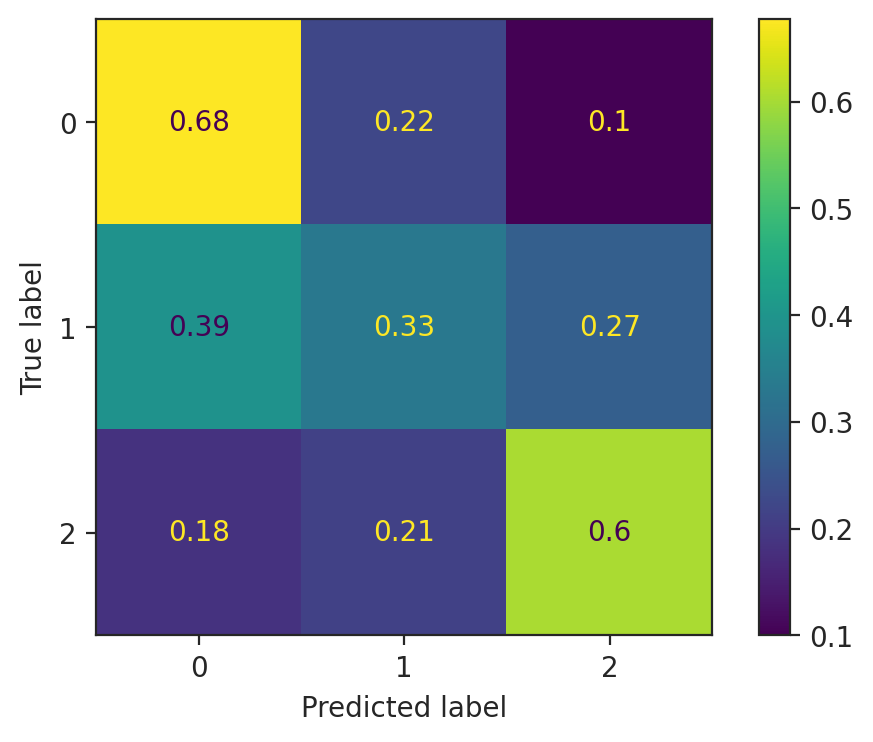

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test, predictions, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
with open('predict_cascading.pkl', 'wb') as file:
    pickle.dump(predict_cascading, file)